# Carbon instensity of Sustainable PV for Energy Transition
This analysis explores the carbon implications of different PV sustainability/circular economy designs in the context of achieving energy transition. These calculations build upon previous work that can be found in journals 13 and 17.

Attempt 1

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'CarbonAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
carbonfolder = str(Path().resolve().parent.parent / 'PV_ICE'/ 'baselines'/ 'CarbonLayer')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')
energyanalysisfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.11.5


In [3]:
import PV_ICE
PV_ICE.__version__

''

In [4]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#000000', #PV ICE baseline
              '#595959', '#7F7F7F', '#A6A6A6', '#D9D9D9', #BAU, 4 grays, perc, shj, topcon, irena
              #'#067872','#0aa39e','#09d0cd','#00ffff', #realistic cases (4) teals, perc, shj, topcon, irena
              '#0579C1','#C00000','#FFC000', #extreme cases (3) long life, high eff, circular
                '#6E30A0','#00B3B5','#10C483', #ambitious modules (5) high eff+ long life, 50 yr perc, recycleSi, 
               '#97CB3F','#FF7E00' #circular perovskite+life, circular perovkiste+ high eff
                ] 

colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B', 'black'] #colors for material plots       

import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV_ICE','PERC','SHJ','TOPCon','Low\nQuality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff\n+ Long-life','Long-Life\n+ Recycling',
                         'Recycled-Si\n+ Long-life','Circular\n+ Long-life',
                        'Circular\n+ High Eff'
                    ]  

scennames_labels_flat = ['PV_ICE','PERC','SHJ','TOPCon','Low Quality',
                         'Long-Lived','High Eff','Circular',
                        'High Eff + Long-life','Long-Life + Recycling',
                         'Recycled-Si + Long-life','Circular + Long-life',
                        'Circular + High Eff'
                    ] 

In [5]:
MATERIALS = ['glass', 'silicon', 'silver', 'aluminium_frames', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [198]:
#load in the simulation from Energy Analysis journal
#sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Deploy_MirletzLinear\sim1.pkl')
sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Deploy_HieslmairSigmoid\sim1.pkl')
#sim1 = PV_ICE.Simulation.load_Simpickle(filename=r'C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis\Deploy_ExpoToFlat\sim1.pkl')


In [199]:
sim1.scenario['r_PERC'].dataOut_e

mod_MFG   mod_Install  mod_OandM  mod_Repair   mod_Demount  \
0    5.100675e+10  5.218383e+07        0.0         0.0  0.000000e+00   
1    2.000736e+10  2.024658e+07        0.0         0.0  3.334110e-01   
2    2.276802e+10  2.279250e+07        0.0         0.0  2.577242e+01   
3    3.488451e+10  3.455051e+07        0.0         0.0  3.160848e+02   
4    7.146438e+10  7.003510e+07        0.0         0.0  1.821996e+03   
..            ...           ...        ...         ...           ...   
96   2.679303e+13  7.513347e+10        0.0         0.0  6.263916e+10   
97   2.893271e+13  8.113359e+10        0.0         0.0  6.984759e+10   
98   1.561072e+13  4.377583e+10        0.0         0.0  2.459524e+10   
99   1.586147e+13  4.447900e+10        0.0         0.0  2.538845e+10   
100  1.620853e+13  4.545222e+10        0.0         0.0  2.650713e+10   

     mod_Store  mod_Resell_Certify  mod_ReMFG_Disassembly  mod_Recycle_Crush  \
0          0.0                 0.0                    0.0       0.000000e+00   
1          0.0                 0.0                    0.0       1.410855e+00   
2          0.0                 0.0                    0.0       1.090580e+02   
3          0.0                 0.0                    0.0       1.337538e+03   
4          0.0                 0.0                    0.0       7.709921e+03   
..         ...                 ...                    ...                ...   
96         0.0                 0.0                    0.0       3.147618e+12   
97         0.0                 0.0                    0.0       3.509841e+12   
98         0.0                 0.0                    0.0       1.235911e+12   
99         0.0                 0.0                    0.0       1.275769e+12   
100        0.0                 0.0                    0.0       1.331983e+12   

     e_out_annual_[Wh]  
0         1.256856e+12  
1         1.741612e+12  
2         2.289873e+12  
3         3.131165e+12  
4         4.863158e+12  
..                 ...  
96        1.355841e+17  
97        1.359336e+17  
98        1.362831e+17  
99        1.366325e+17  
100       1.369820e+17  

[101 rows x 10 columns]

<Axes: >

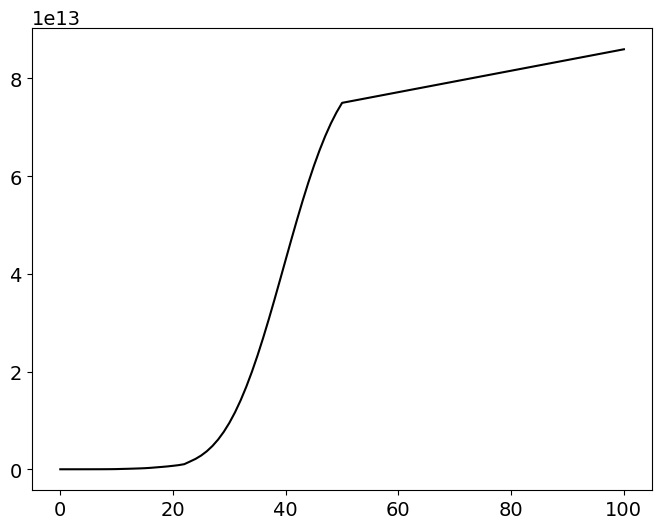

In [200]:
sim1.scenario['PV_ICE'].dataOut_m['Effective_Capacity_[W]'].plot()

## Project grid forward to 100% re in 2050
To parallel the PV deployment, we will assume that we globally hit 100% RE in 2050 with the 75 TW of PV. As such, we need to change the future projection of marketshares of the different country grids.

One scenario with decarb grid, one scenario with decarb grid and heat

Estimating that 60-70% generation will be from Solar, 30-40% from wind, and any remainder from "other renewables"

In [201]:
countrygridmix = pd.read_csv(os.path.join(carbonfolder,'baseline_countrygridmix.csv'), index_col='year')
gridsources = ['Bioenergy','Hydro','Nuclear','OtherFossil','OtherRenewables','Solar','Wind']
nonRE = ['Coal','Gas','OtherFossil','Nuclear','Bioenergy']

In [202]:
countrygridmix.loc[2023:,:]=np.nan #delete 2023 to 2050
nonRE_search = '|'.join(nonRE) #create nonRE search
countrygridmix.loc[2050, countrygridmix.columns.str.contains(nonRE_search)] = 0.0 #set all nonRE to 0 in 2050

In [203]:
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Solar')] = 63.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Wind')] = 33.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('Hydro')] = 3.0
countrygridmix.loc[2050, countrygridmix.columns.str.contains('OtherRenewables')] = 1.0
#numbers derived from leading scenario electricity generation Breyer et al 2022 scenarios (EU focused)

In [204]:
countrygridmix_100RE2050 = countrygridmix.interpolate() #linearly interpolate between 2022 and 2050

In [205]:
apnd_idx = pd.RangeIndex(start=2051,stop=2101,step=1) #create temp df
apnd_df = pd.DataFrame(columns=countrygridmix_100RE2050.columns, index=apnd_idx )
countrygridmix_100RE20502100 = pd.concat([countrygridmix_100RE2050.loc[2000:],apnd_df], axis=0) #extend through 2100
countrygridmix_100RE20502100.ffill(inplace=True) #propogate 2050 values through 2100

In [206]:
countrygridmix_100RE20502100.loc[2050]

China_Bioenergy            0.0
China_Coal                 0.0
China_Gas                  0.0
China_Hydro                3.0
China_Nuclear              0.0
                          ... 
Zambia_Nuclear             0.0
Zambia_OtherFossil         0.0
Zambia_OtherRenewables     1.0
Zambia_Solar              63.0
Zambia_Wind               33.0
Name: 2050, Length: 472, dtype: float64

This is a simple projection, assumes all countries have same ratio of PV and wind (which we know can't be true). Update in future with country specific projections.

In [207]:
pd.read_csv(os.path.join(carbonfolder,'baseline_electricityemissionfactors.csv'), index_col=[0])

CO2eq_gpWh_IPCC2006  CO2eq_gpWh_ember  CO2_gpWh_EIA  \
Energy Source                                                          
Bioenergy                     0.3005             0.230        0.0000   
Coal                          0.3487             0.820        0.3215   
Gas                           0.2291             0.490        0.1805   
Hydro                         0.0000             0.024        0.0000   
Nuclear                       0.0000             0.012        0.0000   
OtherFossil                   0.2671             0.700        0.2413   
OtherRenewables               0.0000             0.038        0.0000   
Solar                         0.0000             0.048        0.0000   
Wind                          0.0000             0.011        0.0000   
SteamAndHeat                  0.0000             0.000        0.0000   

                 CO2_gpWh_EPA  
Energy Source                  
Bioenergy              0.3170  
Coal                   0.3380  
Gas                    0.1810  
Hydro                  0.0000  
Nuclear                0.0000  
OtherFossil            0.0000  
OtherRenewables        0.0000  
Solar                  0.0000  
Wind                   0.0000  
SteamAndHeat           0.2266

In [208]:
sim1.calculateCarbonFlows(countrygridmixes=countrygridmix_100RE20502100)



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  PV_ICE
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_PERC
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  r_SHJ
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on C

# Carbon Analysis
this will become the aggregate carbon results function

In [209]:
scenarios = sim1.scenario

In [210]:
#simply group mod and mats carbon dfs by scenario
sim_carbon_dfs = pd.DataFrame()

for scen in scenarios:
    print(scen)
    mod_carbon_scen_results = sim1.scenario[scen].dataOut_c.add_prefix(str(scen+'_'))
    
    scenmatdc = pd.DataFrame()
    for mat in MATERIALS:
        print(mat)
        mat_carbon_scen_results = sim1.scenario[scen].material[mat].matdataOut_c.add_prefix(str(scen+'_'+mat+'_')) 
        scenmatdc = pd.concat([scenmatdc,mat_carbon_scen_results], axis=1) #group all material dc
    
    scen_carbon_results = pd.concat([mod_carbon_scen_results,scenmatdc], axis=1) #append mats to mod
    sim_carbon_dfs = pd.concat([sim_carbon_dfs, scen_carbon_results], axis=1) #append all scens "raw" data

#FIX INDEX of dfs
sim_carbon_dfs.index = pd.RangeIndex(start=2000,stop=2101,step=1)
    
#return sim_carbon_results, sim_annual_carbon

PV_ICE
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_SHJ
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_TOPCon
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
r_IRENA
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_High_eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
ex_Circular
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_EffLife
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_50PERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_RecycledPERC
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_life
glass
silicon
silver
aluminium_frames
copper
encapsulant
backsheet
h_Perovskite_Eff
glass
silicon
silver
aluminium_frames
copper
encapsulant
b

In [211]:
#Do math on the carbon dfs, take in the output aggregate sim df
sim_annual_carbon = pd.DataFrame()
for scen in scenarios:
    mod_mfg_carbon_total = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #annual mfging elec carbon
    mod_nonvMFG = ['Install','OandM','Repair','Demount','Store','Resell','ReMFG','Recycle'] #could remove from loop
    nonvMFG_search = '|'.join(mod_nonvMFG) #create nonRE search
    mod_carbon_sum_nonvmfg = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(nonvMFG_search)].filter(like=scen).filter(like='_mod_') #annual non mfging carbon
    scen_annual_carbon_mod = pd.concat([mod_mfg_carbon_total,mod_carbon_sum_nonvmfg], axis=1)
    scen_annual_carbon_mod[scen+'_Annual_Emit_mod_elec_gCO2eq'] = scen_annual_carbon_mod.sum(axis=1)

    scenmatdcmaths = pd.DataFrame()
    for mat in MATERIALS:
        scen_mat_dc_temp = sim_carbon_dfs.filter(like=scen).filter(like=mat)
        #calculation for annual carbon emissions total (selecting to avoid double countings)
        mat_global_vmfg_elec = scen_mat_dc_temp.filter(like='Global_vmfg_elec') #select global mod mfging
        mat_vmfg_countries = scen_mat_dc_temp.filter(like='vmfg_elec') #select country specific mod mfging, includes global
        mat_emit_lifecycle = scen_mat_dc_temp.loc[:,~scen_mat_dc_temp.columns.isin(mat_vmfg_countries.columns)] #select everything not the two above
        
        scen_mat_annual_carbon = pd.concat([mat_global_vmfg_elec,mat_emit_lifecycle], axis=1) #group global mod, lifecycle
        scen_mat_annual_carbon[scen+'_Annual_Emit_'+mat+'_gCO2eq'] = scen_mat_annual_carbon.sum(axis=1) #sum annual emit
        
        scenmatdcmaths = pd.concat([scenmatdcmaths,scen_mat_annual_carbon], axis=1)
        #add by material
        #add by process, fuel, elec
        
        #mat_ce_recycle = mat_carbon_scen_results.filter(like='Recycle_e_p')
        #mat_ce_remfg = mat_carbon_scen_results.filter(like='ReMFG_clean')
        #mat_landfill = mat_carbon_scen_results.filter(like='landfill_total')
        #mat_scen_annual_carbon = pd.concat([mat_vmfg_total,mat_ce_recycle,mat_ce_remfg,mat_landfill], axis=1)
    scen_modmat_annual_carbon = pd.concat([scen_annual_carbon_mod,scenmatdcmaths], axis=1)
    scen_modmat_annual_carbon[scen+'_Annual_Emit_total_modmats_gCO2eq'] = scen_modmat_annual_carbon.filter(like='Annual_Emit').sum(axis=1)
    
    sim_annual_carbon = pd.concat([sim_annual_carbon, scen_modmat_annual_carbon], axis=1)


    #FIX INDEX of dfs
sim_annual_carbon.index = pd.RangeIndex(start=2000,stop=2101,step=1)


In [212]:
#create cumulative
sim_cumu_carbon = sim_annual_carbon.cumsum()
maxy = round(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq').max()/1e12,-3) #for graphing
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats_gCO2eq')

PV_ICE_Annual_Emit_total_modmats_gCO2eq               3.202837e+16
r_PERC_Annual_Emit_total_modmats_gCO2eq               2.412450e+16
r_SHJ_Annual_Emit_total_modmats_gCO2eq                2.296610e+16
r_TOPCon_Annual_Emit_total_modmats_gCO2eq             2.345077e+16
r_IRENA_Annual_Emit_total_modmats_gCO2eq              3.572808e+16
ex_Life_Annual_Emit_total_modmats_gCO2eq              2.552620e+16
ex_High_eff_Annual_Emit_total_modmats_gCO2eq          3.279803e+16
ex_Circular_Annual_Emit_total_modmats_gCO2eq          2.995347e+16
h_EffLife_Annual_Emit_total_modmats_gCO2eq            2.485862e+16
h_50PERC_Annual_Emit_total_modmats_gCO2eq             2.545395e+16
h_RecycledPERC_Annual_Emit_total_modmats_gCO2eq       2.659007e+16
h_Perovskite_life_Annual_Emit_total_modmats_gCO2eq    2.941659e+16
h_Perovskite_Eff_Annual_Emit_total_modmats_gCO2eq     2.589143e+16
Name: 2100, dtype: float64

In [213]:
#save the carbondataframe as csvs for now
sim_annual_carbon.to_csv(os.path.join(testfolder,'13scen_carbon_annual.csv'))
sim_cumu_carbon.to_csv(os.path.join(testfolder,'13scen_carbon_cumu.csv'))


# Carbon Emissions Cumulative Scenario compare

In [214]:
sim_cumu_carbon_mmt = sim_cumu_carbon.filter(like='Annual_Emit_total_modmats_gCO2eq')/1e12
sim_cumu_carbon_mmt

PV_ICE_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.481254   
2001                                 1.969319   
2002                                 2.491843   
2003                                 3.202322   
2004                                 4.482671   
...                                       ...   
2096                             30662.367272   
2097                             30961.510838   
2098                             31286.329197   
2099                             31639.429418   
2100                             32028.372868   

      r_PERC_Annual_Emit_total_modmats_gCO2eq  \
2000                                 1.350279   
2001                                 1.837443   
2002                                 2.325783   
2003                                 2.989782   
2004                                 4.186370   
...                                       ...   
2096                             23513.978870   
2097                             23723.247541   
2098                             23855.272003   
2099                             23988.835905   
2100                             24124.500003   

      r_SHJ_Annual_Emit_total_modmats_gCO2eq  \
2000                                1.315947   
2001                                1.802876   
2002                                2.282255   
2003                                2.934070   
2004                                4.108702   
...                                      ...   
2096                            22385.362978   
2097                            22584.421334   
2098                            22710.007105   
2099                            22837.057164   
2100                            22966.104890   

      r_TOPCon_Annual_Emit_total_modmats_gCO2eq  \
2000                                   1.332954   
2001                                   1.819999   
2002                                   2.303817   
2003                                   2.961668   
2004                                   4.147176   
...                                         ...   
2096                               22857.650861   
2097                               23060.953573   
2098                               23189.216888   
2099                               23318.975716   
2100                               23450.774808   

      r_IRENA_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.481254   
2001                                  1.969320   
2002                                  2.491843   
2003                                  3.202320   
2004                                  4.482653   
...                                        ...   
2096                              34107.986846   
2097                              34524.693602   
2098                              34933.556233   
2099                              35333.130310   
2100                              35728.080361   

      ex_Life_Annual_Emit_total_modmats_gCO2eq  \
2000                                  1.413552   
2001                                  1.901152   
2002                                  2.406005   
2003                                  3.092458   
2004                                  4.329510   
...                                        ...   
2096                              23322.881575   
2097                              23887.254357   
2098                              24446.782542   
2099                              24995.122784   
2100                              25526.198587   

      ex_High_eff_Annual_Emit_total_modmats_gCO2eq  \
2000                                      1.312583   
2001                                      1.799488   
2002                                      2.277990   
2003                                      2.928612   
2004                                      4.101092   
...                                            ...   
2096                                  31034.209492   
2097

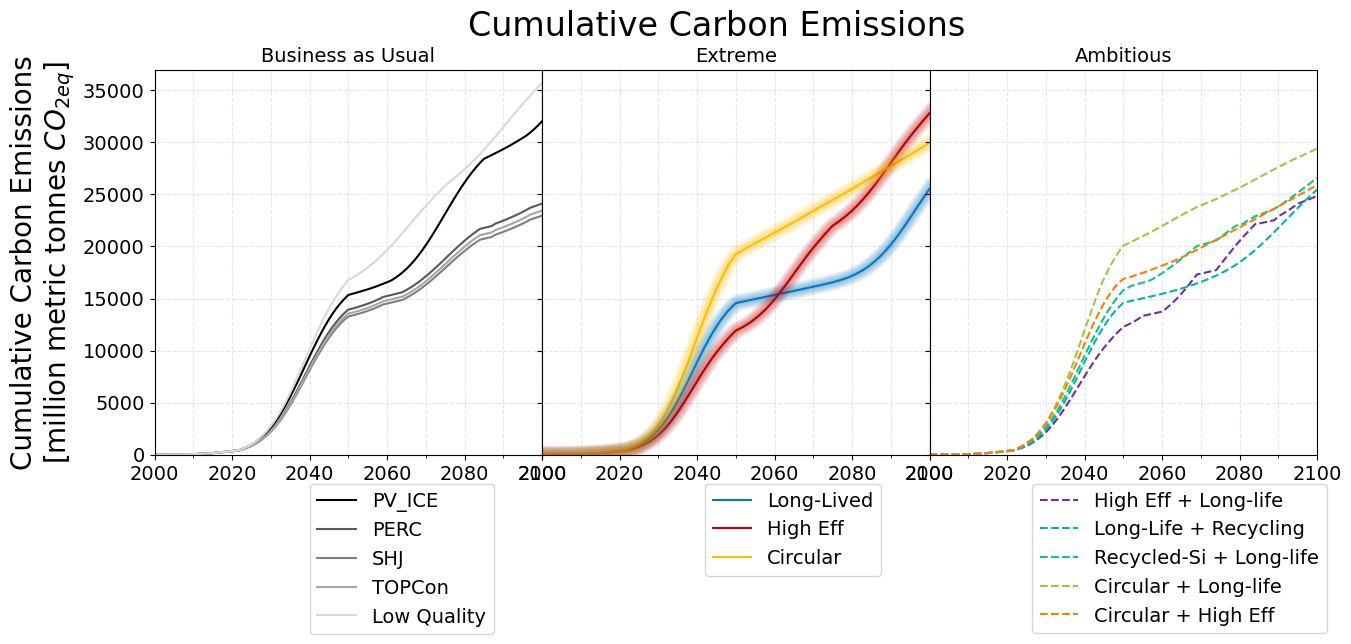

In [215]:

fig_cumu_carbon, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5), sharey=True, sharex=True, 
                                      gridspec_kw={'wspace':0})

#BAU
ax1.set_prop_cycle(color=colorpalette[0:5])
ax1.plot(sim_cumu_carbon_mmt.iloc[:,0:5], label=scennames_labels_flat[0:5]) # baselines
ax1.set_title('Business as Usual', fontsize=14)
ax1.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax1.set_xlim(2000,2100)
ax1.legend(bbox_to_anchor=(0.9,-0.05))
ax1.set_ylim(0,maxy+1000)
ax1.xaxis.set_minor_locator(MultipleLocator(10))
ax1.grid(axis='both', which='both', color='0.9', ls='--') 


#Extreme
ax2.set_prop_cycle(color=colorpalette[5:8])

ax2.plot(sim_cumu_carbon_mmt.iloc[:,5:8], label=scennames_labels_flat[5:8])
ax2.xaxis.set_minor_locator(MultipleLocator(10))
ax2.grid(axis='both', which='both', color='0.9', ls='--') 

#create glowlines for Extreme scens
n_lines = 10
diff_linewidth = 1.05
alpha_value = 0.05
for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,5],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[5])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,6],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[6])

for n in range(1, n_lines+1):    
    ax2.plot(sim_cumu_carbon_mmt.iloc[:,7],
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            color=colorpalette[7])

ax2.set_title('Extreme', fontsize=14)
ax2.legend(bbox_to_anchor=(0.9,-0.05))

#Ambitious
ax3.set_prop_cycle(color=colorpalette[8:])
ax3.plot(sim_cumu_carbon_mmt.iloc[:,8:], label=scennames_labels_flat[8:], ls='--')# 
ax3.set_title('Ambitious', fontsize=14)
ax3.legend(bbox_to_anchor=(1.05,-0.05)) #(x,y)
ax3.xaxis.set_minor_locator(MultipleLocator(10))
ax3.grid(axis='both', which='both', color='0.9', ls='--') 

#overall figure

fig_cumu_carbon.suptitle('Cumulative Carbon Emissions', fontsize=24, y=1)
plt.show()
#fig_cumu_carbon.savefig('energyresults-annualMatDemands-decade.png', dpi=300, bbox_inches='tight')

# Literature Validation

In [216]:
#comparing to Ember open source data, uses a lifecycle PV emission factor from IPCC for electricity carbon
ember_PVCO2 = pd.read_csv(os.path.join(carbonfolder,'Ember-PVEmissionsWorld2000-2022.csv'), index_col='year')
#ember_PVCO2['emissions_mtco2'] #ANNUAL DATA
ember_PVCO2_cumu = ember_PVCO2.cumsum()

In [217]:
#compare to Fthenakis and Leccisi 2021 analysis
FL2021_gwp_scSi2020 = 1010 #kg CO2eq/kWp from Fthenakis and Leccisi 2021 "sc_Si 2020"
FL2021_gwp_scSi2015 = 2000 #"scSi 2015"
FL2021_gwp_mcSi2020 = 1087 #mcSi 2020
FL2021_gwp_mcSi2015 = 1435 #mcSi 2015

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

FL2021_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
FL2021_gwp_range['F&L_sc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2020
FL2021_gwp_range['F&L_sc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_scSi2015
FL2021_gwp_range['F&L_mc-Si_2020'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2020
FL2021_gwp_range['F&L_mc-Si_2015'] = kw_installed_pvice.loc[:22].values*FL2021_gwp_mcSi2015

FL2021_gwp_range_cumu_mmt = FL2021_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [218]:
#compare to Ultra Low Carbon Solar Alliance South Korea rating, as redproduced in Polverini 2023
Polverini2023_low = 550 #kg CO2eq/kWp "France"
Polverini2023_high = 762 #kg CO2eq/kWp "China"

kw_installed_pvice = sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]']*1000 # kW installed

Polverini2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
Polverini2023_gwp_range['Polverini2023_low'] = kw_installed_pvice.loc[:22].values*Polverini2023_low
Polverini2023_gwp_range['Polverini2023_high'] = kw_installed_pvice.loc[:22].values*Polverini2023_high

Polverini2023_gwp_range_cumu_mmt = Polverini2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

In [219]:
#compare to Liang and You 2023, using Figure 1 2020 values from a and e
LiangYou2023_scSi_low = 250 #kg CO2eq/m2 ""
LiangYou2023_scSi_high = 350 #kg CO2eq/m2 ""
LiangYou2023_mcSi_low = 210
LiangYou2023_mcSi_high = 300

m2_installed_pvice = sim1.scenario['PV_ICE'].dataOut_m['Area'] # area deployed in m2

LiangYou2023_gwp_range = pd.DataFrame(index=ember_PVCO2.index)
LiangYou2023_gwp_range['LiangYou2023_scSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_low
LiangYou2023_gwp_range['LiangYou2023_scSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_scSi_high
LiangYou2023_gwp_range['LiangYou2023_mcSi_low'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_low
LiangYou2023_gwp_range['LiangYou2023_mcSi_high'] = m2_installed_pvice.loc[:22].values*LiangYou2023_mcSi_high

LiangYou2023_gwp_range_cumu_mmt = LiangYou2023_gwp_range.cumsum()/1e9 #cumulative, and kg to million metric tonnes

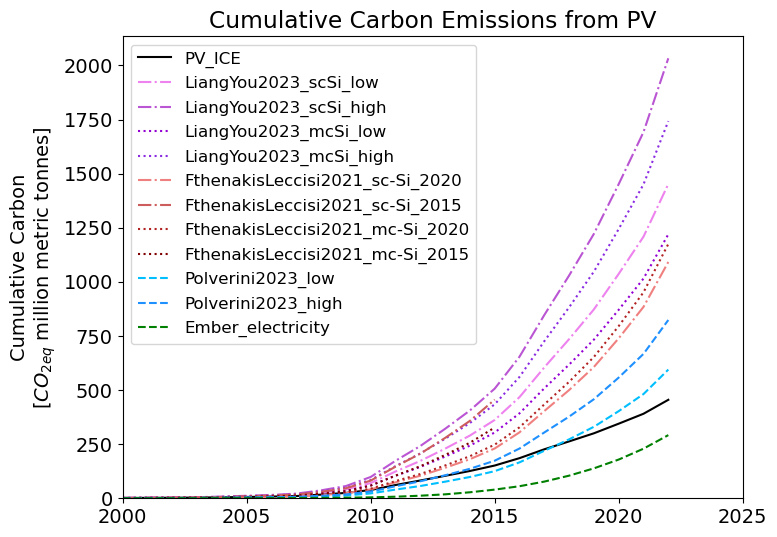

In [220]:
plt.plot(sim_cumu_carbon_mmt.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq'], label='PV_ICE', color='black')

plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_low'], label='LiangYou2023_scSi_low', color='violet', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_scSi_high'], label='LiangYou2023_scSi_high', color='mediumorchid', ls='-.')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_low'], label='LiangYou2023_mcSi_low', color='darkviolet', ls=':')
plt.plot(LiangYou2023_gwp_range_cumu_mmt['LiangYou2023_mcSi_high'], label='LiangYou2023_mcSi_high', color='blueviolet', ls=':')

plt.plot(FL2021_gwp_range_cumu_mmt['F&L_sc-Si_2020'], label='FthenakisLeccisi2021_sc-Si_2020', color='lightcoral', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_sc-Si_2015'], label='FthenakisLeccisi2021_sc-Si_2015', color='indianred', ls='-.')
plt.plot(FL2021_gwp_range_cumu_mmt['F&L_mc-Si_2020'], label='FthenakisLeccisi2021_mc-Si_2020', color='firebrick', ls='dotted')
plt.plot(FL2021_gwp_range_cumu_mmt.loc[:2015,'F&L_mc-Si_2015'], label='FthenakisLeccisi2021_mc-Si_2015', color='maroon', ls='dotted')

plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue', ls='--')
plt.plot(Polverini2023_gwp_range_cumu_mmt['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue', ls='--')

plt.plot(ember_PVCO2_cumu.index, ember_PVCO2_cumu['emissions_mtco2'], label='Ember_electricity', color='green', ls='--')

plt.ylabel('Cumulative Carbon\n[$CO_{2eq}$ million metric tonnes]')
plt.title('Cumulative Carbon Emissions from PV')
plt.xlim(2000,2025)
plt.ylim(0,)
plt.legend(loc='upper left', fontsize=12)

## Flip it, compare on CO2eq/kWp
This is a simple way of doing it, will not work for much beyond 2022, because the annual emissions include end of life of other systems, not just the mfging of installed - its not necessarily fair. Might work out on balance, kinda

In [221]:
#lit factors into scatter points
litfactors = pd.DataFrame(index=ember_PVCO2_cumu.index)

litfactors.loc[2022,'Polverini2023_low'] = Polverini2023_low
litfactors.loc[2022,'Polverini2023_high'] = Polverini2023_high
litfactors.loc[2020,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2020 
litfactors.loc[2015,'FthenakisLeccisi2021_scSi'] = FL2021_gwp_scSi2015 
litfactors.loc[2020,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2020
litfactors.loc[2015,'FthenakisLeccisi2021_mcSi'] = FL2021_gwp_mcSi2015

litfactors.loc[2020,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_low #kg CO2eq/m2 ""
litfactors.loc[2019,'LiangYou2023_scSi_m$^{2}$'] = LiangYou2023_scSi_high  #kg CO2eq/m2 ""
litfactors.loc[2020,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_low 
litfactors.loc[2019,'LiangYou2023_mcSi_m$^{2}$'] = LiangYou2023_mcSi_high

litfactors.loc[2015,'Anctil2021_low'] = 1010
litfactors.loc[2015,'Anctil2021_high'] = 1775
litfactors.loc[2020,'Anctil2021_low'] = 500
litfactors.loc[2020,'Anctil2021_high'] = 750

litfactors.loc[2005,'Jungbluth2005_scSi_m$^{2}$'] = 170 #scSi CO2fossil, might be just module not full lifecycle

litfactors.loc[2020,'Wikoff2022_low_m$^{2}$'] = 125
litfactors.loc[2020,'Wikoff2022_high_m$^{2}$'] = 275


#litfactors

In [222]:
#calculate CO2eq/kWp by dividing annual CO2eq/deployed PV
installs = pd.DataFrame(kw_installed_pvice.loc[:22])
installs.index = ember_PVCO2_cumu.index

pvice_emit_annual = sim_annual_carbon.filter(like='PV_ICE').filter(like='Annual_Emit_total_modmats_gCO2eq').loc[:2022]
pvice_annual_kgco2pkwp = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(installs['new_Installed_Capacity_[MW]'], axis=0)/1e3
#pvice_annual_kgco2pkwp

In [223]:
#calculate CO2eq/m2 for PV ICE
meters2installs = pd.DataFrame(m2_installed_pvice.loc[:22])
meters2installs.index = ember_PVCO2_cumu.index

pvice_annual_kgco2eqpm2 = pvice_emit_annual['PV_ICE_Annual_Emit_total_modmats_gCO2eq'].div(meters2installs['Area'], axis=0)/1e3
#pvice_annual_kgco2eqpm2

In [224]:
litfactors.columns

Index(['Polverini2023_low', 'Polverini2023_high', 'FthenakisLeccisi2021_scSi',
       'FthenakisLeccisi2021_mcSi', 'LiangYou2023_scSi_m$^{2}$',
       'LiangYou2023_mcSi_m$^{2}$', 'Anctil2021_low', 'Anctil2021_high',
       'Jungbluth2005_scSi_m$^{2}$', 'Wikoff2022_low_m$^{2}$',
       'Wikoff2022_high_m$^{2}$'],
      dtype='object')

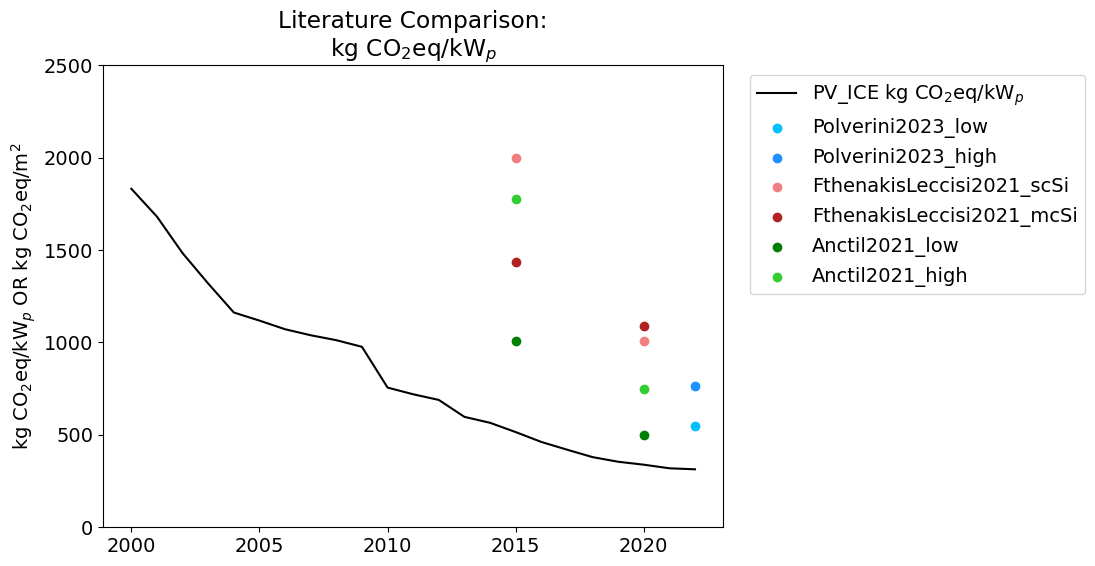

In [225]:
#graphing

plt.plot(pvice_annual_kgco2pkwp, label='PV_ICE kg CO$_{2}$eq/kW$_{p}$', color='black')

plt.scatter(litfactors.index, litfactors['Polverini2023_low'], label='Polverini2023_low', color='deepskyblue')
plt.scatter(litfactors.index, litfactors['Polverini2023_high'], label='Polverini2023_high', color='dodgerblue')

plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_scSi'], label='FthenakisLeccisi2021_scSi', color='lightcoral')
plt.scatter(litfactors.index, litfactors['FthenakisLeccisi2021_mcSi'], label='FthenakisLeccisi2021_mcSi', color='firebrick')

plt.scatter(litfactors.index, litfactors['Anctil2021_low'], label='Anctil2021_low', color='green')
plt.scatter(litfactors.index, litfactors['Anctil2021_high'], label='Anctil2021_high', color='limegreen')


#plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

#plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
#plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

#plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')
plt.ylim(0,2500)
plt.ylabel('kg CO$_{2}$eq/kW$_{p}$ OR kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/kW$_{p}$')
plt.legend(bbox_to_anchor=(1.6,1))

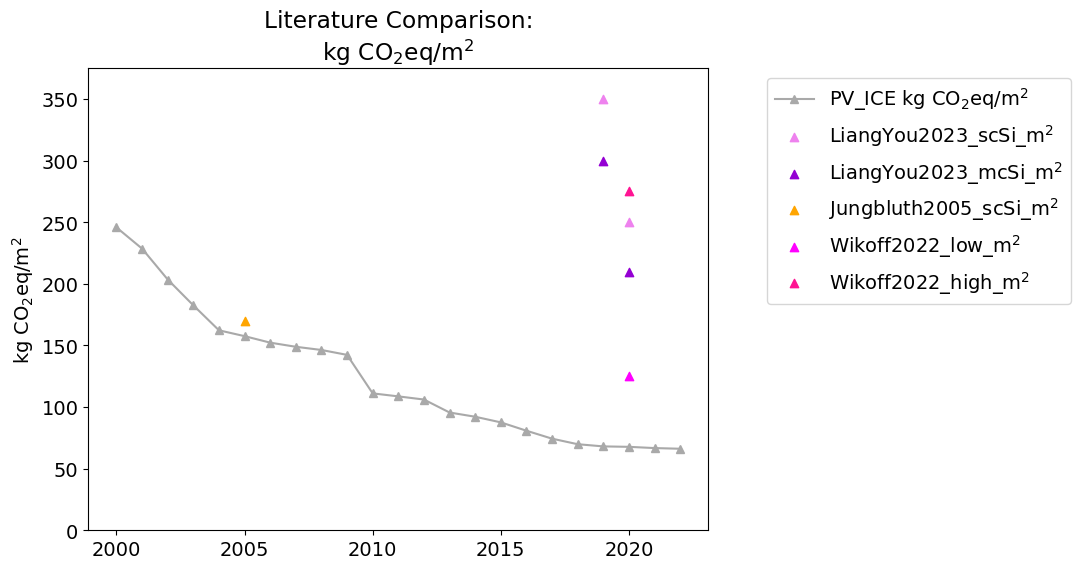

In [226]:
plt.plot(pvice_annual_kgco2eqpm2, label='PV_ICE kg CO$_{2}$eq/m$^{2}$', color='darkgray', marker='^')

plt.scatter(litfactors.index, litfactors['LiangYou2023_scSi_m$^{2}$'], label='LiangYou2023_scSi_m$^{2}$', color='violet', marker='^')
plt.scatter(litfactors.index, litfactors['LiangYou2023_mcSi_m$^{2}$'], label='LiangYou2023_mcSi_m$^{2}$', color='darkviolet', marker='^')

plt.scatter(litfactors.index, litfactors['Jungbluth2005_scSi_m$^{2}$'], label='Jungbluth2005_scSi_m$^{2}$', color='orange', marker='^')

plt.scatter(litfactors.index, litfactors['Wikoff2022_low_m$^{2}$'], label='Wikoff2022_low_m$^{2}$', color='fuchsia', marker='^')
plt.scatter(litfactors.index, litfactors['Wikoff2022_high_m$^{2}$'], label='Wikoff2022_high_m$^{2}$', color='deeppink', marker='^')

plt.ylim(0,375)
plt.ylabel('kg CO$_{2}$eq/m$^{2}$')
plt.title('Literature Comparison:\nkg CO$_{2}$eq/m$^{2}$')
plt.legend(bbox_to_anchor=(1.6,1))

# Contextualize versus Global Carbon Emissions and Budget

In [227]:
annualco2emitglobal_raw = pd.read_csv(os.path.join(carbonfolder,'WorldInData-annual-co2-emissions-per-country.csv'))
annualco2emitglobal_subset = annualco2emitglobal_raw.loc[(annualco2emitglobal_raw['Entity']=='World')&(annualco2emitglobal_raw['Year']>=2000), 'Year':]
annualco2emitglobal_subset.index=annualco2emitglobal_subset['Year']

#create % PV emit vs world
pvice_annualPVemit_bmt = sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15 #bmt
world_annual_bmt = annualco2emitglobal_subset.iloc[:,1]/1e9 #bmt

percentPVemitvsWorld = pvice_annualPVemit_bmt/world_annual_bmt*100

In [228]:
#cumulative compare
sim_cumu_carbon_bmt = sim_cumu_carbon_mmt.loc[:,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e3
sim_cumu_carbon_bmt

2000     0.001481
2001     0.001969
2002     0.002492
2003     0.003202
2004     0.004483
          ...    
2096    30.662367
2097    30.961511
2098    31.286329
2099    31.639429
2100    32.028373
Name: PV_ICE_Annual_Emit_total_modmats_gCO2eq, Length: 101, dtype: float64

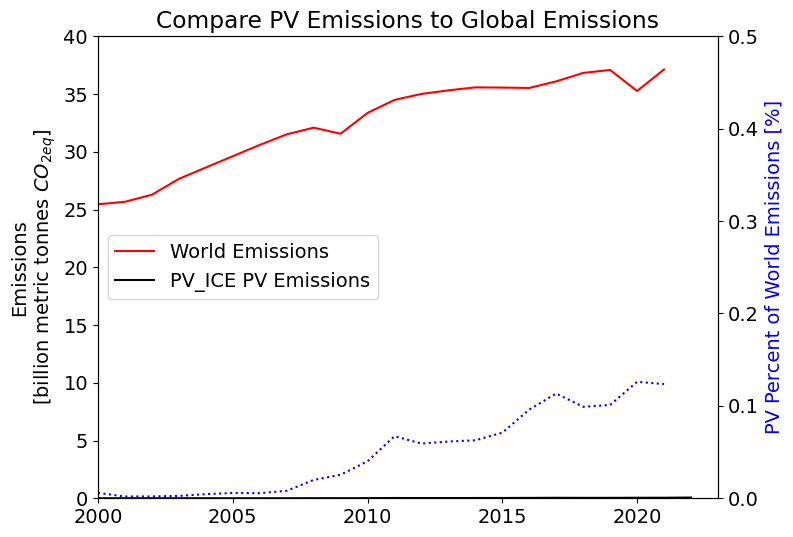

In [229]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Emissions', color='red') #bmt
ax1.plot(sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15,
         label='PV_ICE PV Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2023)

ax2 = ax1.twinx()
ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare PV Emissions to Global Emissions')
ax1.legend(loc='center left')
plt.show()

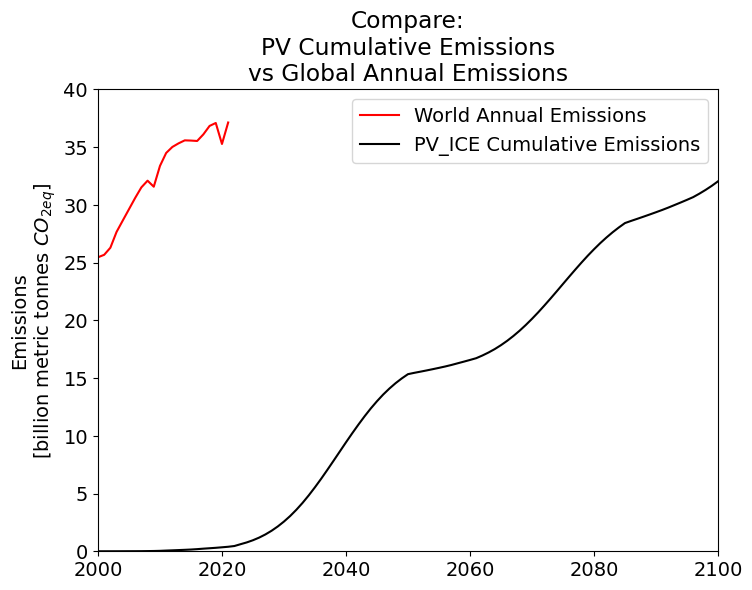

In [230]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'World Annual Emissions', color='red') #bmt
ax1.plot(sim_cumu_carbon_bmt, label='PV_ICE Cumulative Emissions', color='black')
ax1.set_ylim(0,40)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2100)

#ax2 = ax1.twinx()
#ax2.plot(percentPVemitvsWorld,ls=':', color='blue')
#ax2.set_ylabel('PV Percent of World Emissions [%]', color='blue')
#ax2.set_ylim(0,0.5)
#ax2.set_xlim(2000,2022)

plt.title('Compare:\nPV Cumulative Emissions\nvs Global Annual Emissions')
ax1.legend(loc='upper right')
plt.show()

In [231]:
annualEmitGlobal_SSPs = pd.read_csv(os.path.join(supportMatfolder,'CarbonIntensities','input-CarbonEmitProjections-SSP15.csv'),
                                   skiprows=1, index_col=0)

In [232]:
annualEmitGlobal_SSPs.iloc[:,0:2] = annualEmitGlobal_SSPs.iloc[:,0:2].interpolate()
#as percent of global emit scenarios SSPs
pvice_annualPVemit_full_bmt = sim_annual_carbon.loc[:,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15
percentPVemitvsWorld_SSP1 = pvice_annualPVemit_full_bmt/annualEmitGlobal_SSPs['SSP1_IMAGE_[GtCO2eq/year]']*100
percentPVemitvsWorld_SSP5 = pvice_annualPVemit_full_bmt/annualEmitGlobal_SSPs['SSP5_REMIND_[GtCO2eq/year]']*100


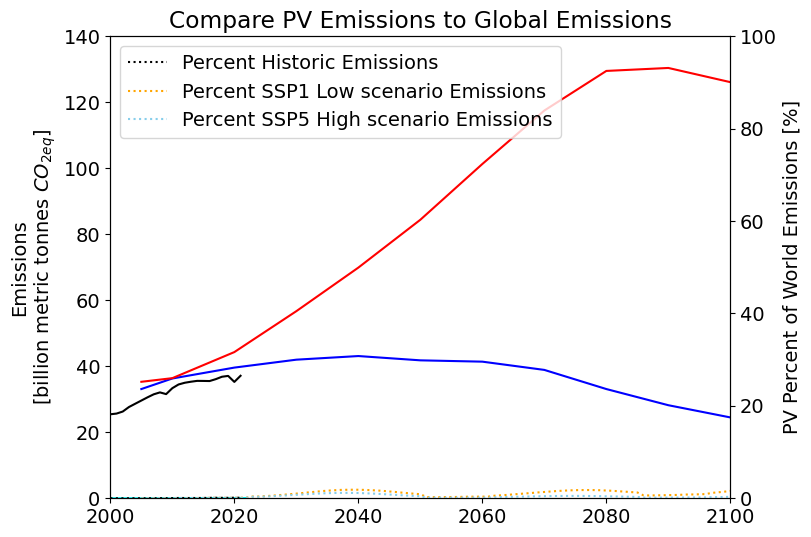

In [233]:
fig_worldcompare, ax1 = plt.subplots()

ax1.plot(annualco2emitglobal_subset.iloc[:,1]/1e9, label = 'Historical World Emissions', color='black') #bmt

ax1.plot(annualEmitGlobal_SSPs['SSP1_IMAGE_[GtCO2eq/year]'], label='SSP1', color='blue')
ax1.plot(annualEmitGlobal_SSPs['SSP5_REMIND_[GtCO2eq/year]'], label='SSP5', color='red')

ax1.plot(sim_annual_carbon.loc[:2022,'PV_ICE_Annual_Emit_total_modmats_gCO2eq']/1e15,
         label='PV_ICE PV Emissions', color='aqua')
ax1.set_ylim(0,140)
ax1.set_ylabel('Emissions\n[billion metric tonnes $CO_{2eq}$]')
ax1.set_xlim(2000,2100)

ax2 = ax1.twinx()
ax2.plot(percentPVemitvsWorld, label='Percent Historic Emissions', ls=':', color='black')
ax2.plot(percentPVemitvsWorld_SSP1, label='Percent SSP1 Low scenario Emissions', ls=':', color='orange')
ax2.plot(percentPVemitvsWorld_SSP5, label='Percent SSP5 High scenario Emissions', ls=':', color='skyblue')

percentPVemitvsWorld_SSP1
ax2.set_ylabel('PV Percent of World Emissions [%]')
ax2.set_ylim(0,100)
#ax2.set_xlim(2000,2022)

plt.title('Compare PV Emissions to Global Emissions')
plt.legend(loc='upper left')
plt.show()

# Cabon Emissions by material or module

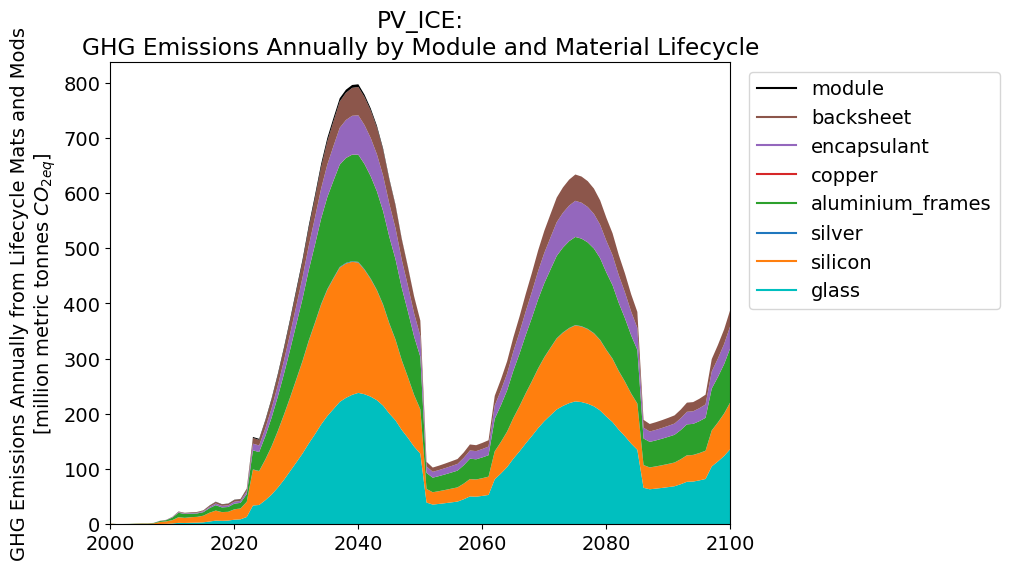

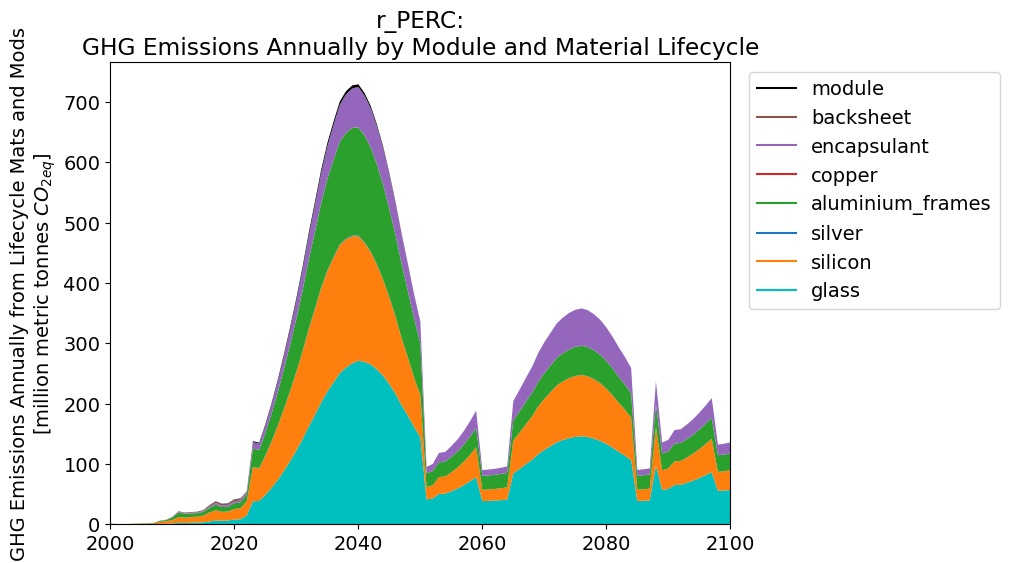

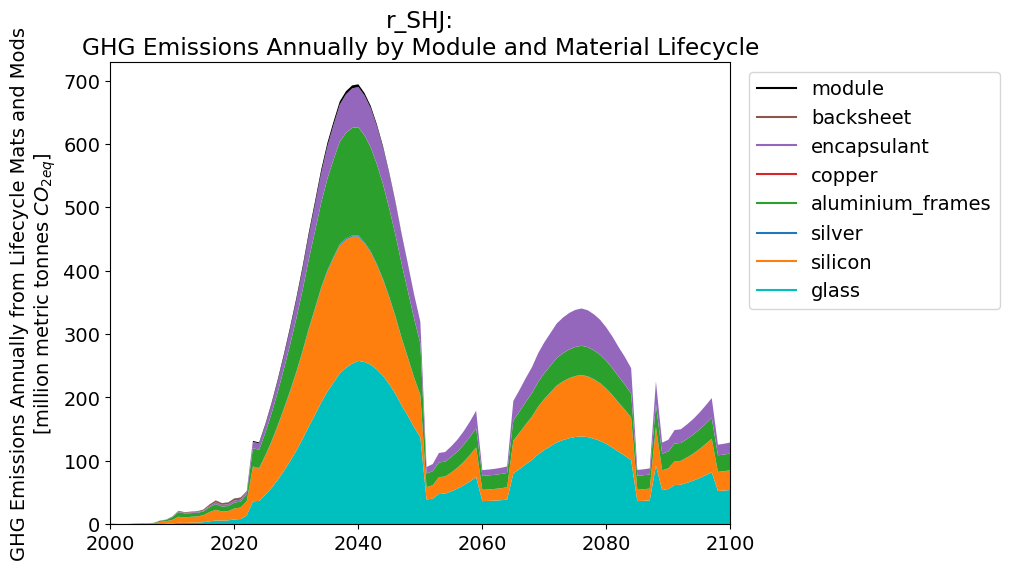

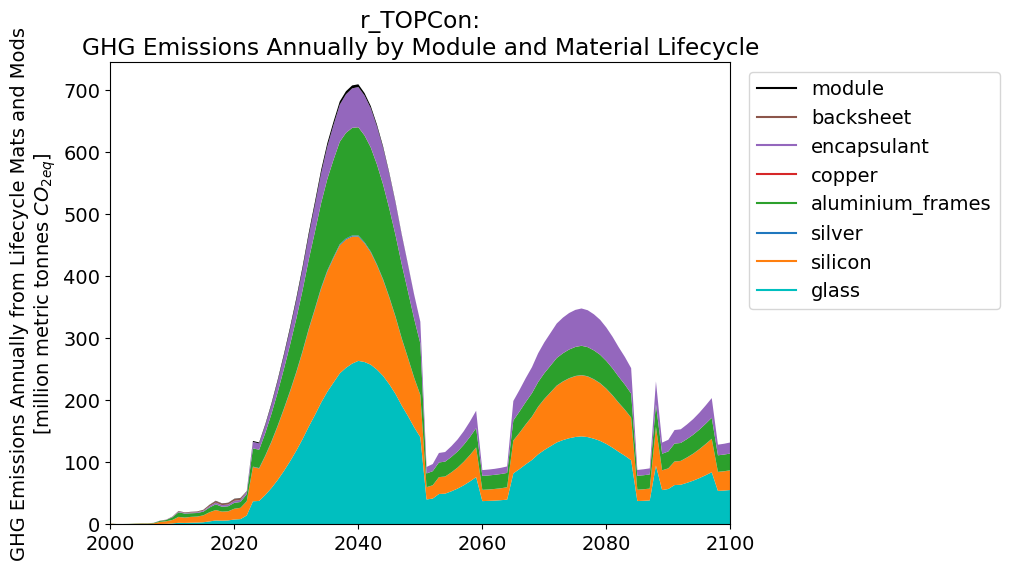

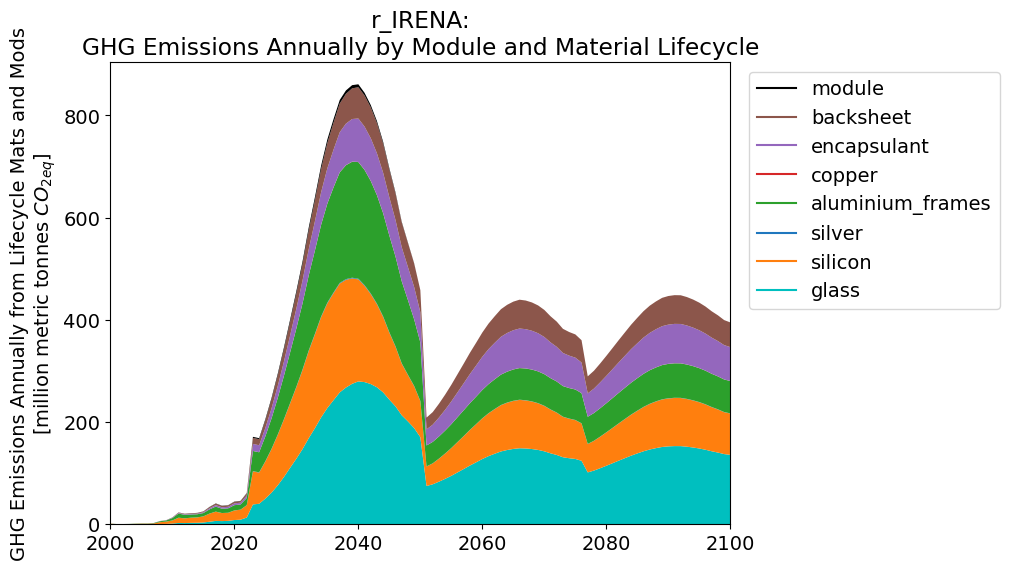

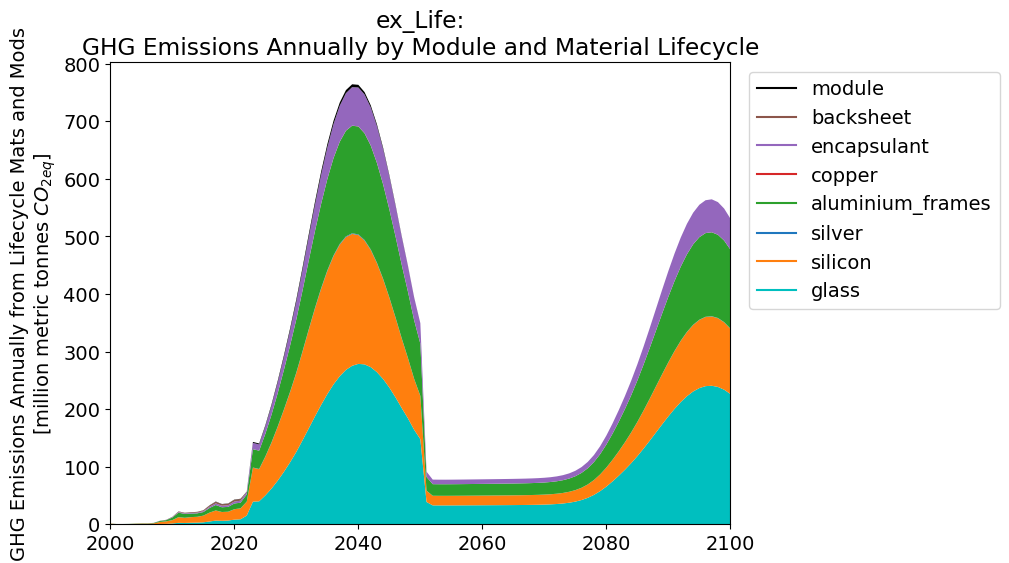

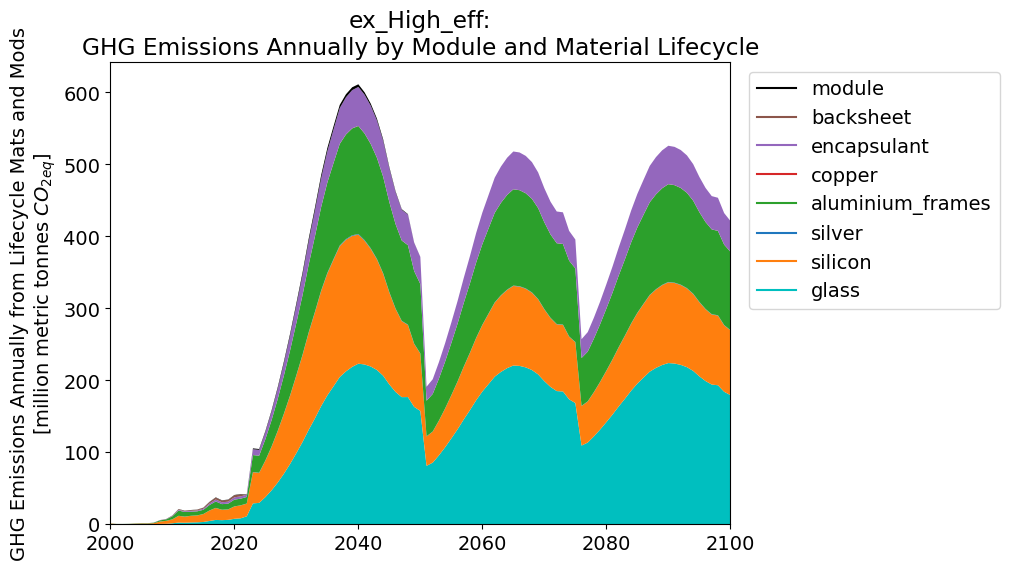

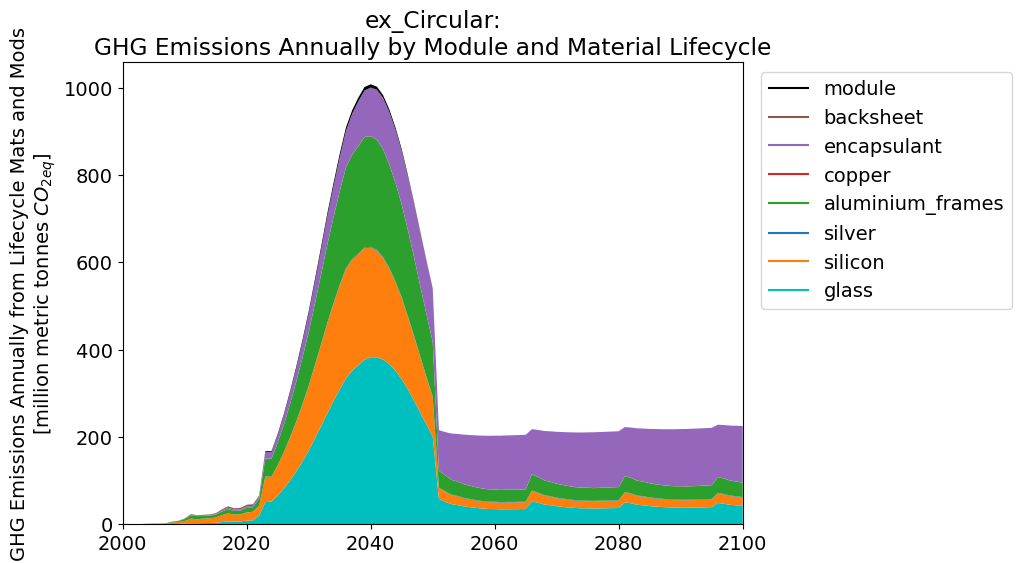

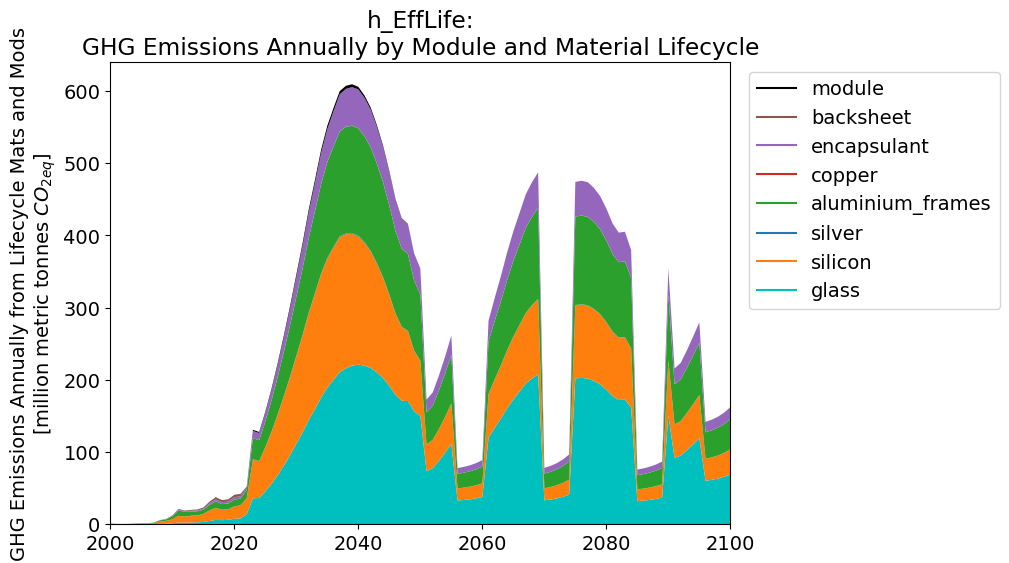

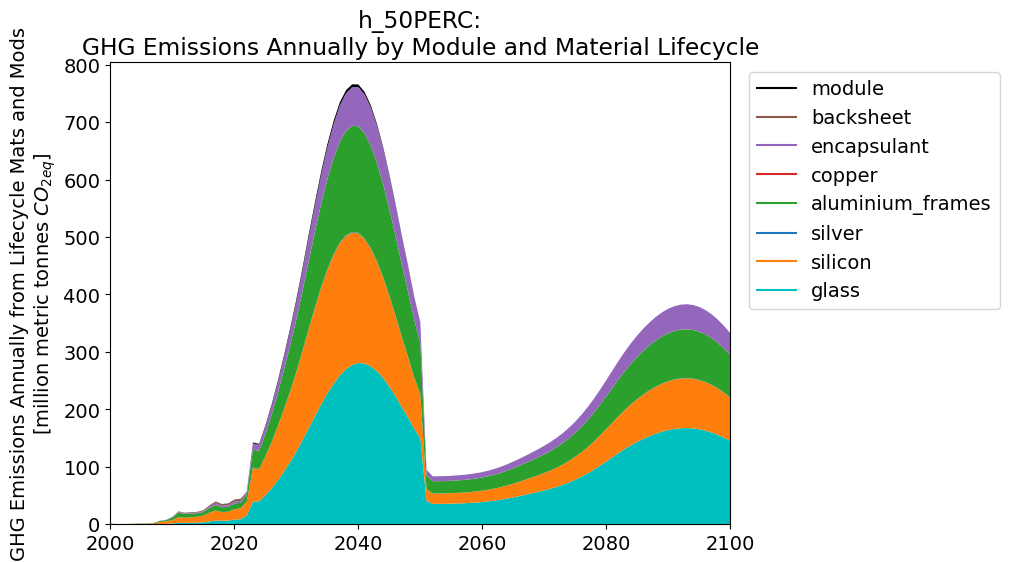

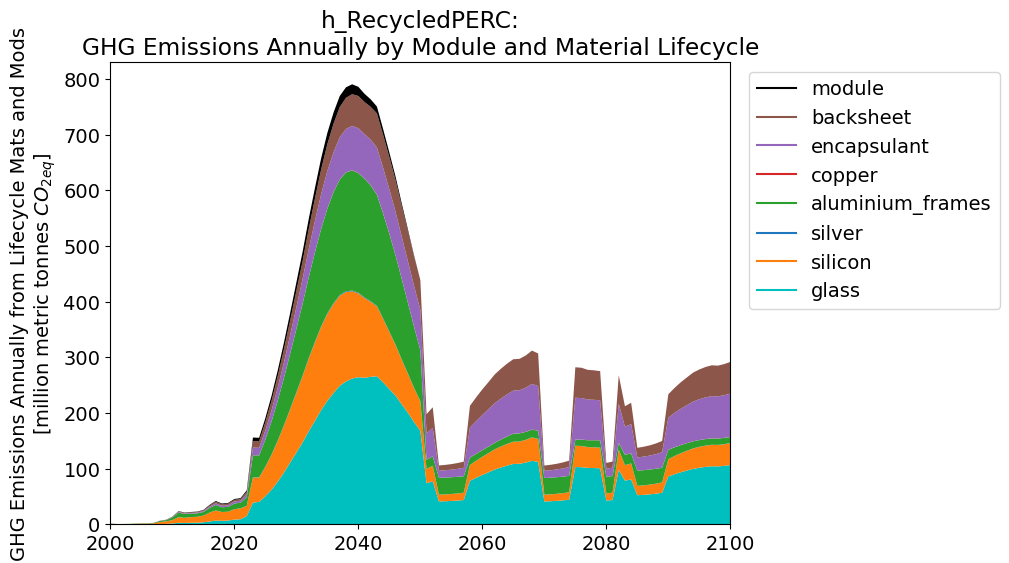

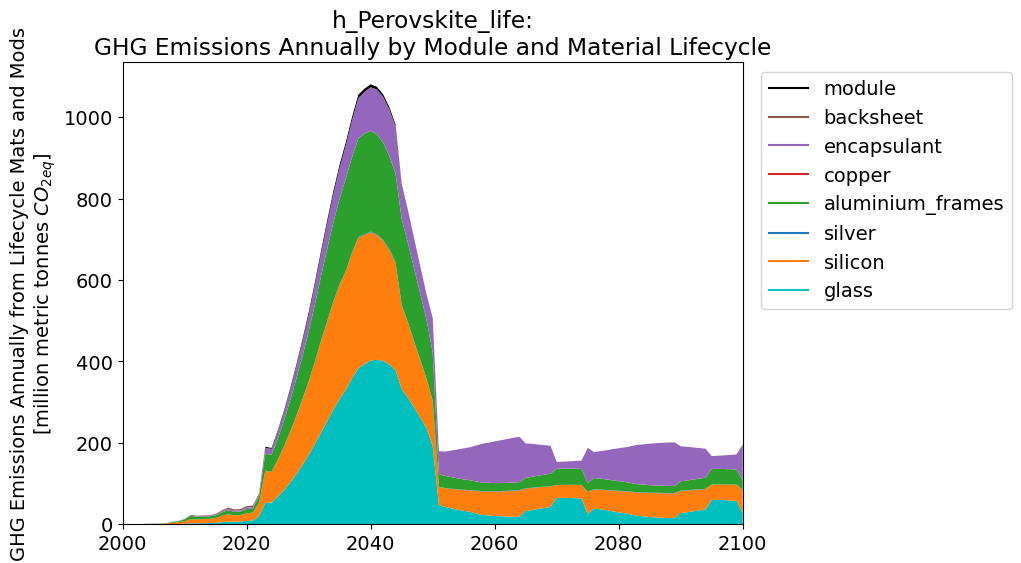

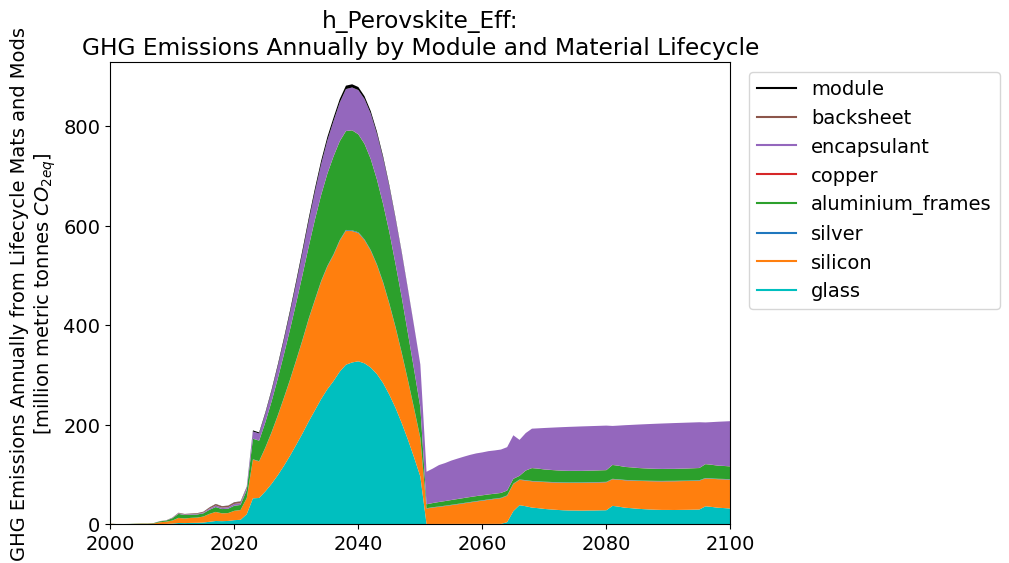

In [234]:
for scen in scenarios:

    scen_annual_carbon = sim_annual_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_annual_carbon.index,
                  scen_annual_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_annual_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_annual_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))

#plt.legend()
    plt.show()

In [235]:
maxy

36000.0

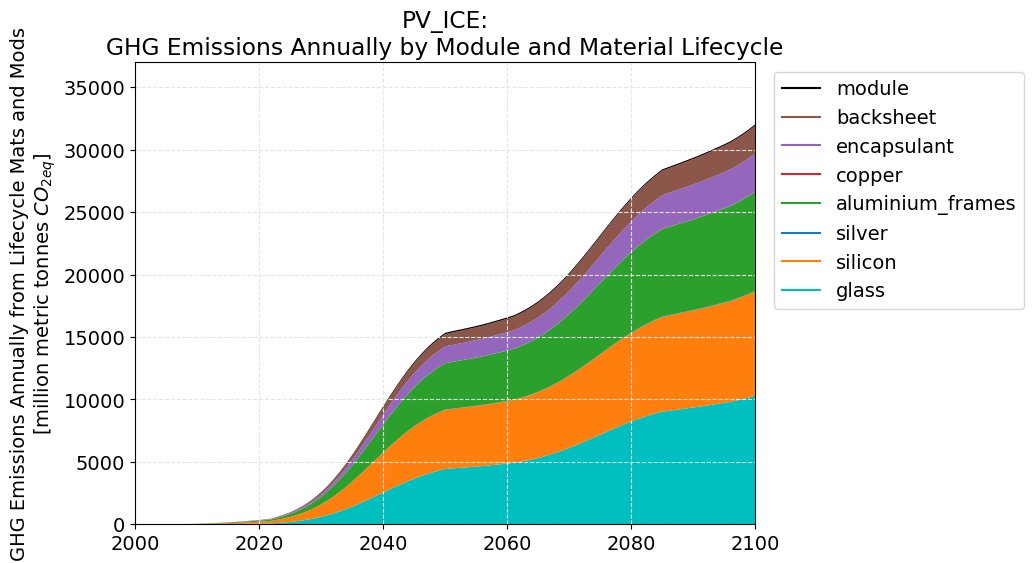

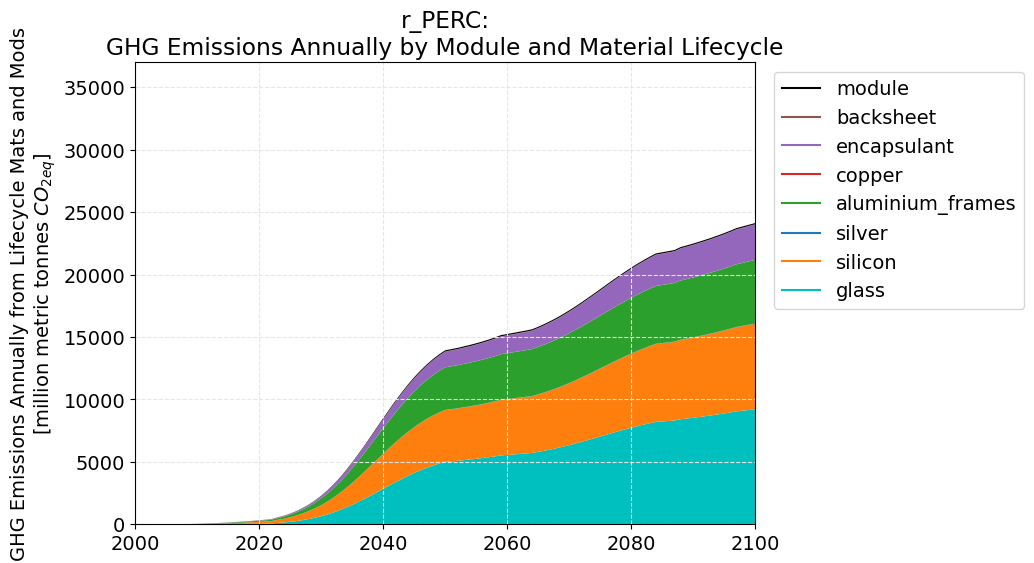

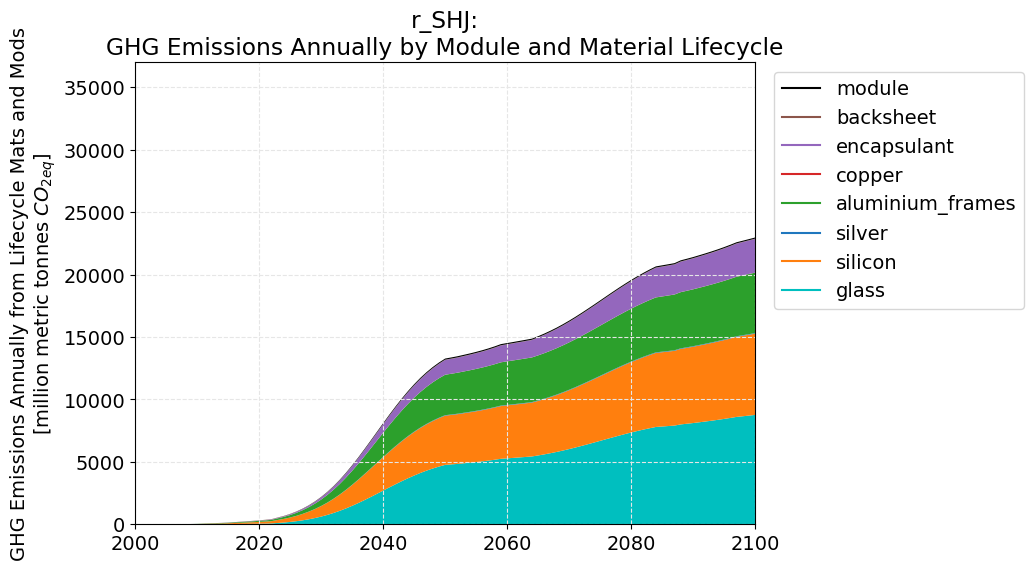

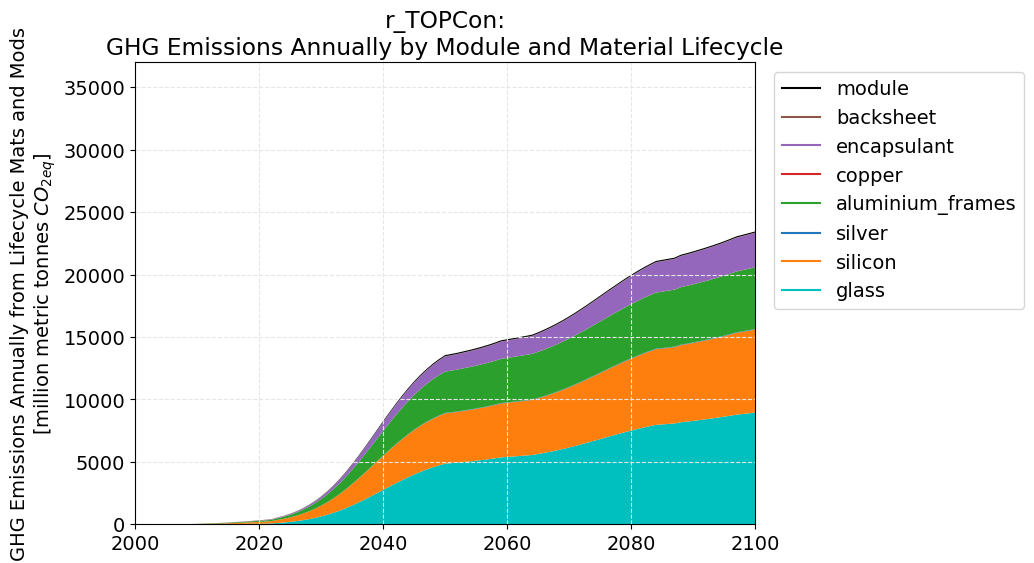

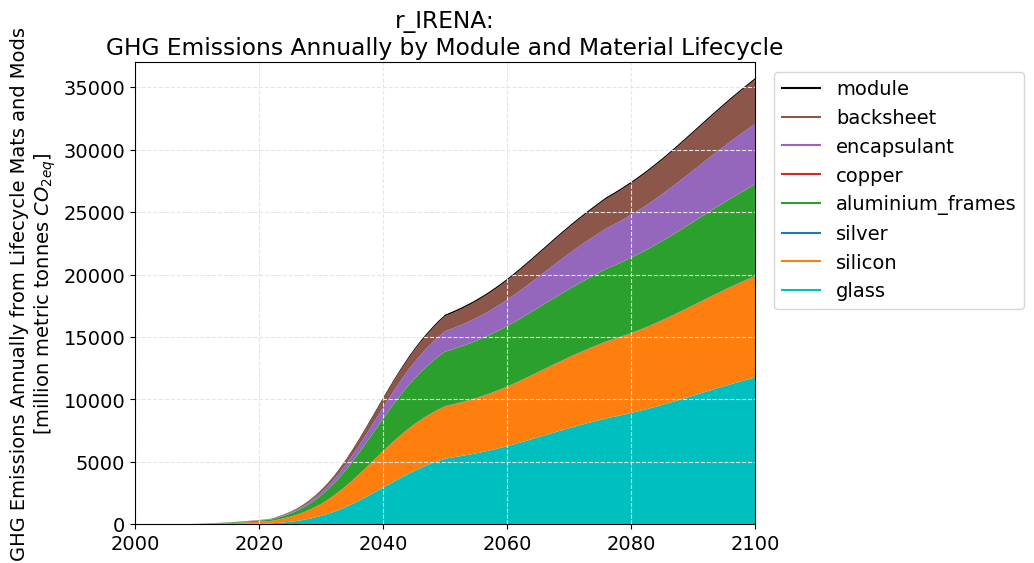

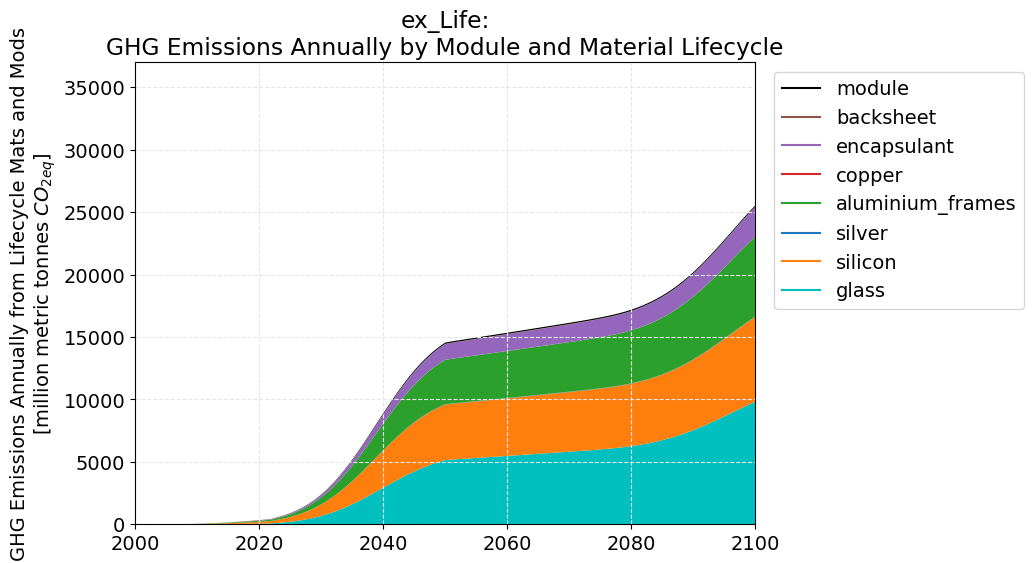

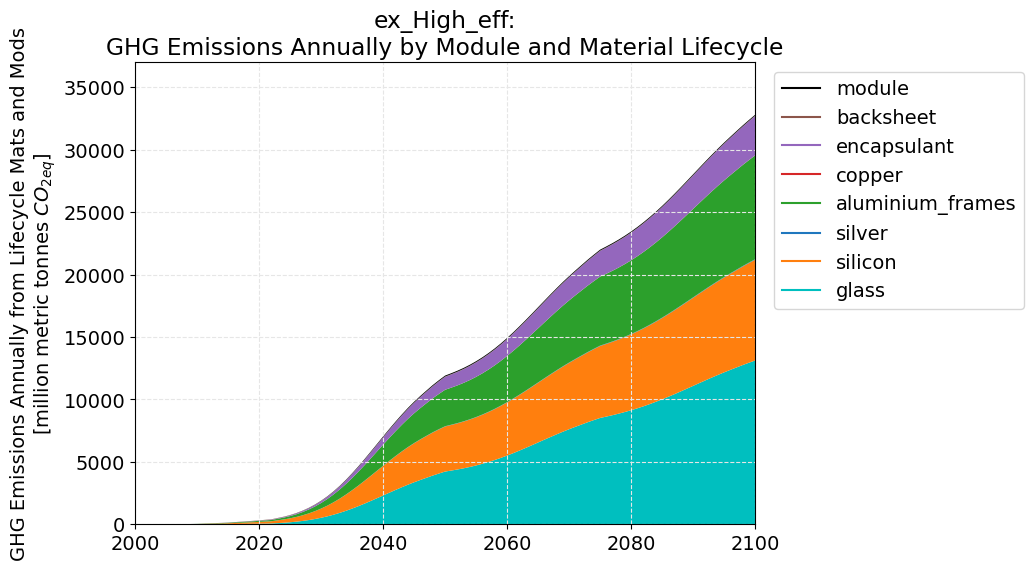

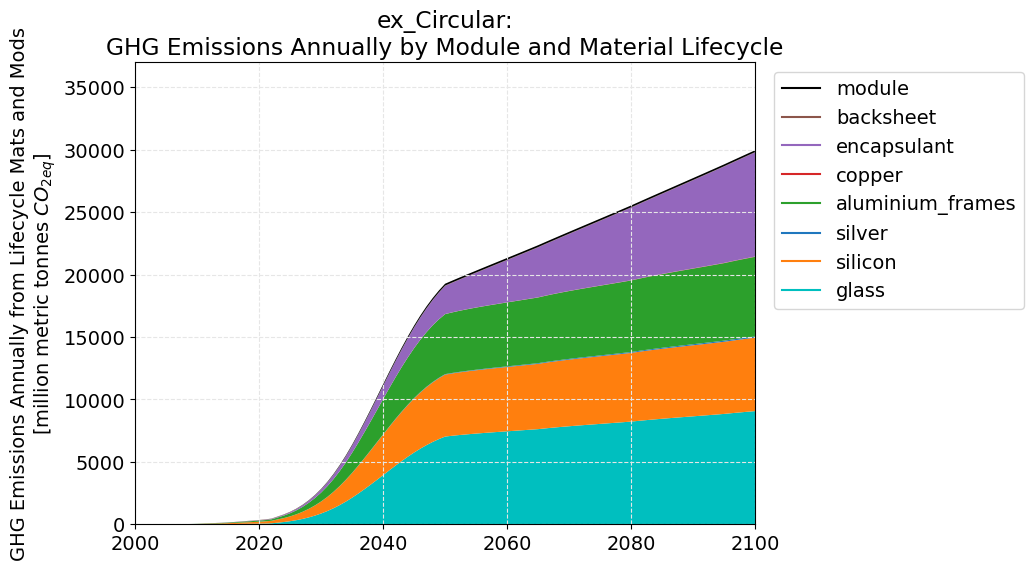

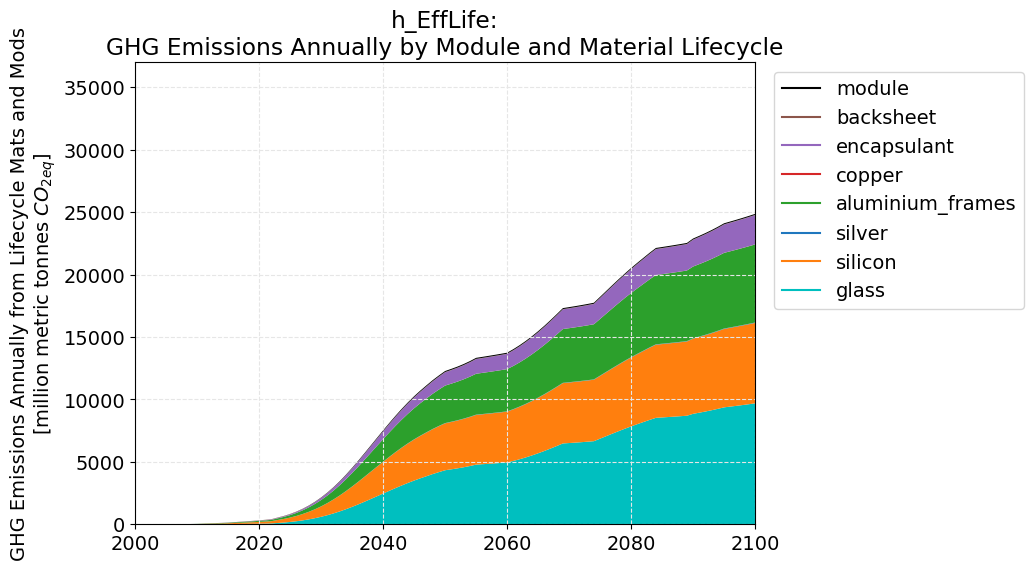

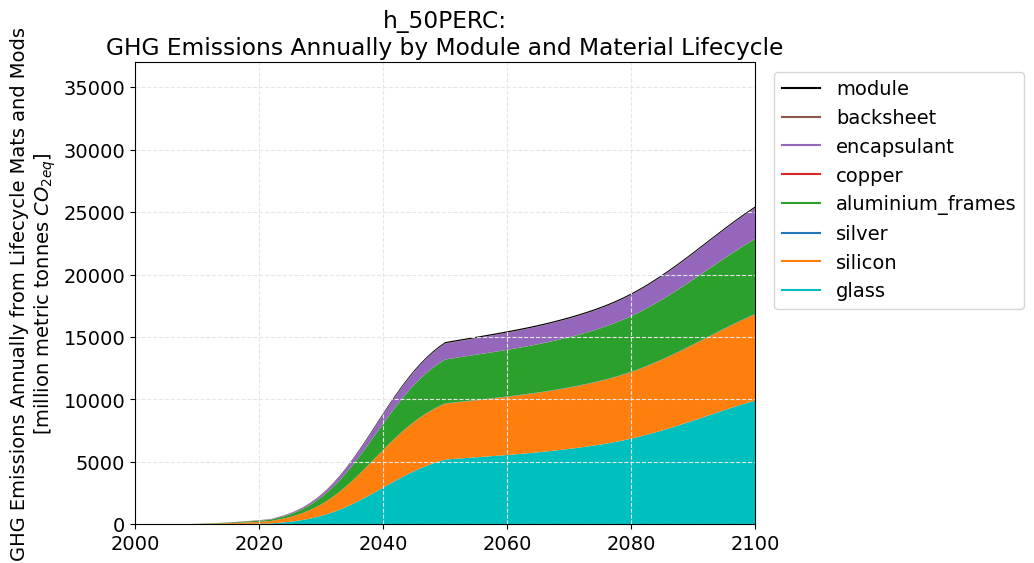

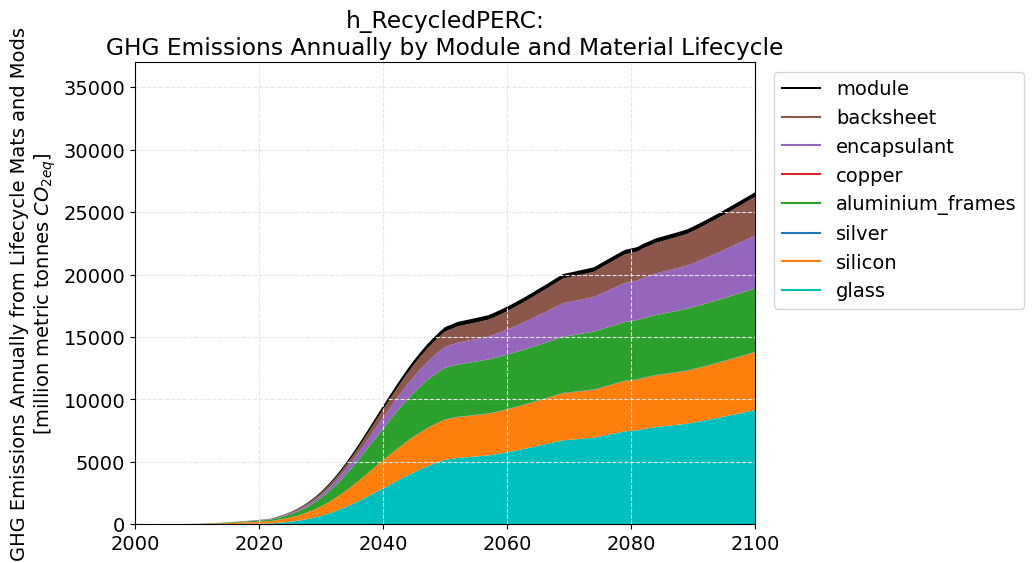

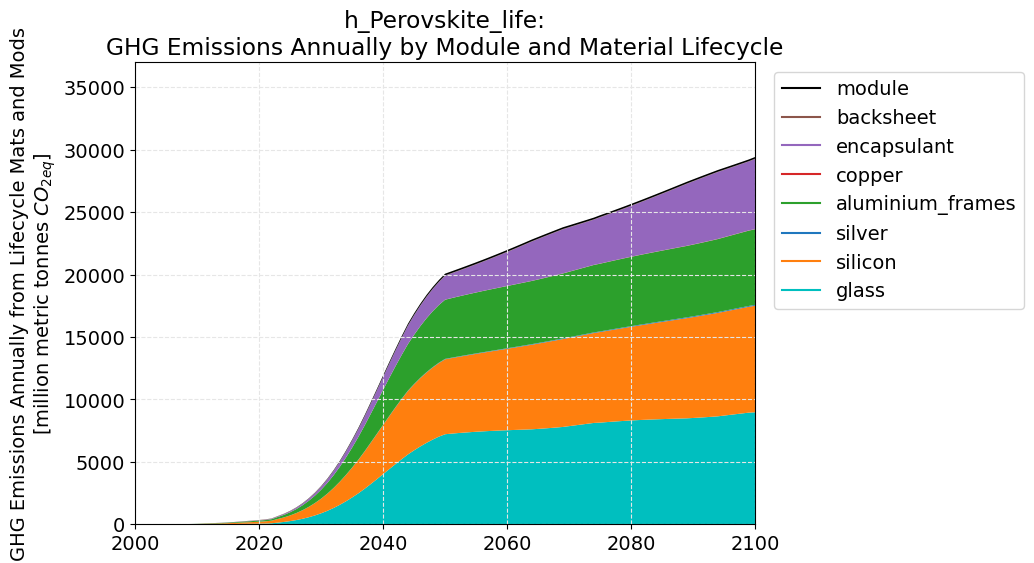

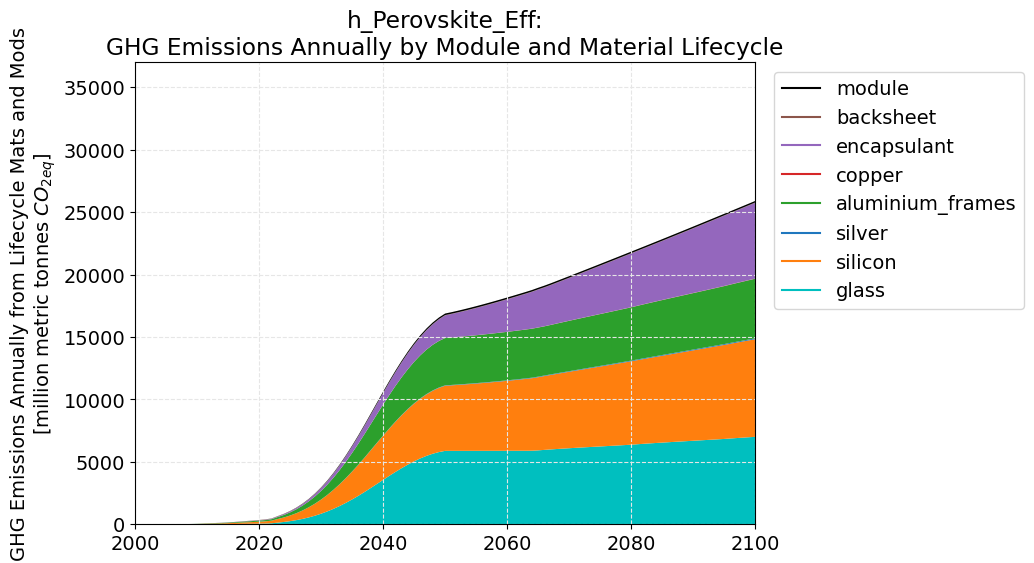

In [236]:
#colormats = ['#00bfbf','#ff7f0e','#1f77be','#2ca02c','#d62728','#9467BD','#8C564B','black'] #colors for material plots
for scen in scenarios:

    scen_cumu_carbon = sim_cumu_carbon.filter(like='Annual_Emit').filter(like=scen)/1e12 #million tonnes
    
    plt.plot([],[],color=colormats[0], label=MATERIALS[0])
    plt.plot([],[],color=colormats[1], label=MATERIALS[1])
    plt.plot([],[],color=colormats[2], label=MATERIALS[2])
    plt.plot([],[],color=colormats[3], label=MATERIALS[3])
    plt.plot([],[],color=colormats[4], label=MATERIALS[4])
    plt.plot([],[],color=colormats[5], label=MATERIALS[5])
    plt.plot([],[],color=colormats[6], label=MATERIALS[6])
    plt.plot([],[],color=colormats[7], label='module')


    plt.stackplot(scen_cumu_carbon.index,
                  scen_cumu_carbon[scen+'_Annual_Emit_glass_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_silicon_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_silver_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_aluminium_frames_gCO2eq'], 
                  scen_cumu_carbon[scen+'_Annual_Emit_copper_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_encapsulant_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_backsheet_gCO2eq'],
                  scen_cumu_carbon[scen+'_Annual_Emit_mod_elec_gCO2eq'],
                  colors = colormats)
    plt.title(scen+':\nGHG Emissions Annually by Module and Material Lifecycle')
    plt.ylabel('GHG Emissions Annually from Lifecycle Mats and Mods\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.45,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [237]:
sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec')

PV_ICE_Annual_Emit_mod_elec_gCO2eq               1.023026e+14
r_PERC_Annual_Emit_mod_elec_gCO2eq               9.387779e+13
r_SHJ_Annual_Emit_mod_elec_gCO2eq                8.937543e+13
r_TOPCon_Annual_Emit_mod_elec_gCO2eq             9.124345e+13
r_IRENA_Annual_Emit_mod_elec_gCO2eq              1.200841e+14
ex_Life_Annual_Emit_mod_elec_gCO2eq              9.572272e+13
ex_High_eff_Annual_Emit_mod_elec_gCO2eq          7.641418e+13
ex_Circular_Annual_Emit_mod_elec_gCO2eq          1.463938e+14
h_EffLife_Annual_Emit_mod_elec_gCO2eq            8.099209e+13
h_50PERC_Annual_Emit_mod_elec_gCO2eq             9.631957e+13
h_RecycledPERC_Annual_Emit_mod_elec_gCO2eq       3.570136e+14
h_Perovskite_life_Annual_Emit_mod_elec_gCO2eq    1.381900e+14
h_Perovskite_Eff_Annual_Emit_mod_elec_gCO2eq     1.251060e+14
Name: 2100, dtype: float64

In [238]:
#create a df from which to do a bar chart of 2100 emissions by mat/mod
mats_emit_2100 = pd.DataFrame() #index=scennames_labels_flat
for mat in MATERIALS:
    mat_emit_2100 = pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_'+mat).values)
    mats_emit_2100 = pd.concat([mats_emit_2100, mat_emit_2100], axis=1)

mats_emit_2100
mats_emit_2100.columns = MATERIALS
modmats_emit_2100 = pd.concat([mats_emit_2100,pd.Series(sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_mod_elec').values)], axis=1)
modmats_emit_2100.index = scennames_labels_flat
modmats_emit_2100.rename(columns={0:'module'}, inplace=True)
modmats_emit_2100_megatonne = modmats_emit_2100/1e12
modmats_emit_2100_megatonne

glass      silicon     silver  \
PV_ICE                   10284.668445  8352.915465  41.716861   
PERC                      9211.126614  6836.123265  27.187171   
SHJ                       8757.747634  6503.772557  48.164047   
TOPCon                    8944.464134  6641.044831  46.567178   
Low Quality              11758.651199  8094.473353  43.233520   
Long-Lived                9811.997185  6785.834763  32.530383   
High Eff                 13115.880866  8069.438369  40.400063   
Circular                  9064.432035  5877.909710  96.765829   
High Eff + Long-life      9684.311380  6441.389400  33.105208   
Long-Life + Recycling     9904.249725  6904.964917  35.476460   
Recycled-Si + Long-life   9142.634864  4628.650653  36.178543   
Circular + Long-life      8968.881721  8531.634829  69.904197   
Circular + High Eff       7002.525037  7814.201104  72.803760   

                         aluminium_frames     copper  encapsulant  \
PV_ICE                        7929.612399   8.876447  3061.671748   
PERC                          5089.969603   8.208785  2836.277498   
SHJ                           4840.895039   7.806898  2697.012716   
TOPCon                        4943.554739   7.972690  2754.399712   
Low Quality                   7311.873346  13.480864  4840.730291   
Long-Lived                    6394.853886   7.311261  2375.485270   
High Eff                      8312.118492   9.008162  3153.481497   
Circular                      6379.837582  22.426980  8342.458216   
High Eff + Long-life          6251.545324   7.019577  2338.964802   
Long-Life + Recycling         5999.931789   7.373947  2483.169997   
Recycled-Si + Long-life       5070.660204  11.986646  4237.396671   
Circular + Long-life          6054.806967  15.615571  5614.307309   
Circular + High Eff           4772.243304  16.553479  6064.751648   

                           backsheet      module  
PV_ICE                   2246.608915  102.302588  
PERC                       21.729280   93.877786  
SHJ                        21.330570   89.375430  
TOPCon                     21.528079   91.243446  
Low Quality              3545.553651  120.084137  
Long-Lived                 22.463119   95.722720  
High Eff                   21.291570   76.414183  
Circular                   23.250434  146.393801  
High Eff + Long-life       21.291502   80.992086  
Long-Life + Recycling      22.463363   96.319573  
Recycled-Si + Long-life  3105.551983  357.013553  
Circular + Long-life       23.250434  138.189957  
Circular + High Eff        23.250434  125.106030

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\3630820325.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


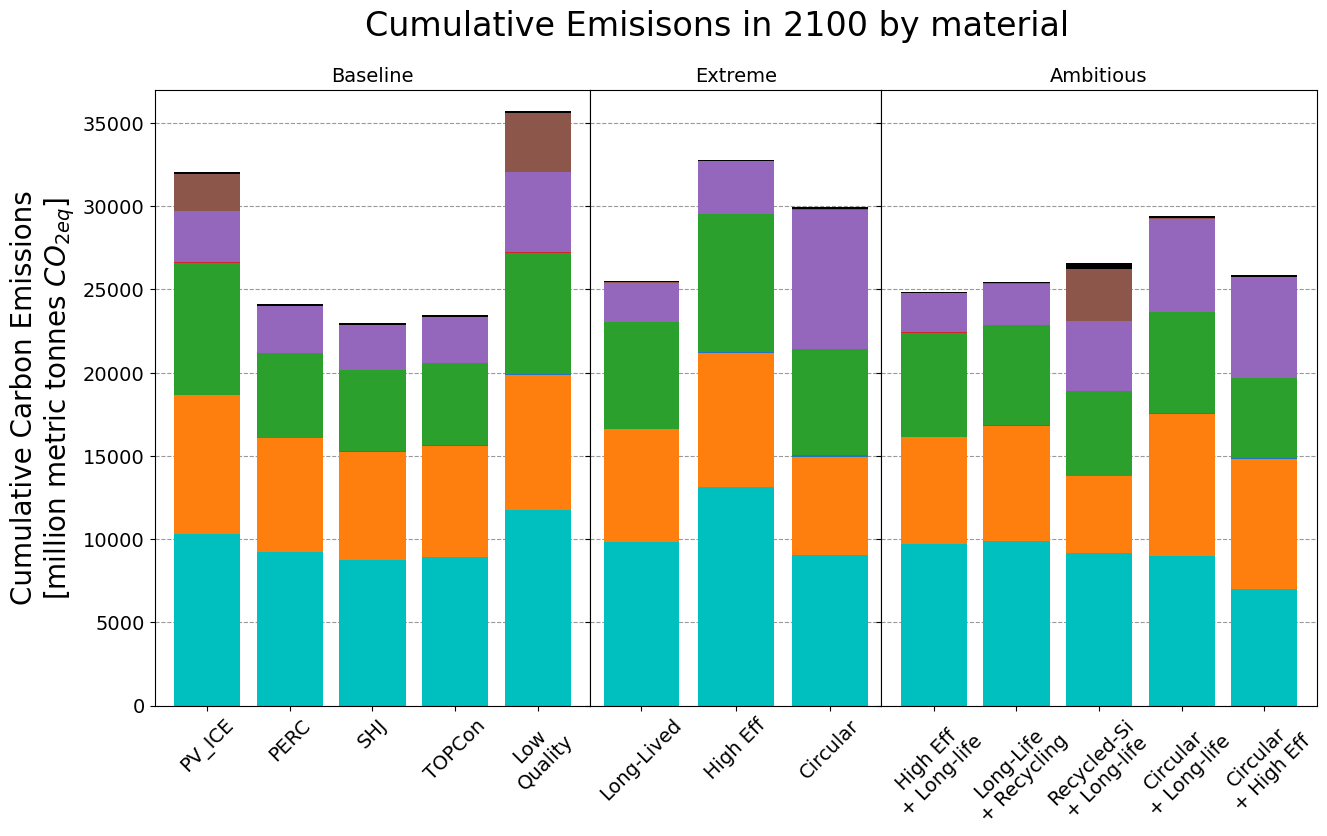

In [239]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silicon'],
        bottom=modmats_emit_2100_megatonne[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], modmats_emit_2100_megatonne[0:5]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silicon'],
        bottom=modmats_emit_2100_megatonne[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], modmats_emit_2100_megatonne[5:8]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silicon'],
        bottom=modmats_emit_2100_megatonne[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['silver'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['aluminium_frames'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['copper'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['encapsulant'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['backsheet'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], modmats_emit_2100_megatonne[8:]['module'],
       bottom=modmats_emit_2100_megatonne.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Cumulative Emisisons in 2100 by material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

In [240]:
cumu_emit_sum = modmats_emit_2100_megatonne.sum(axis=1)
fraction_modmats_cumu_emit = modmats_emit_2100_megatonne.div(cumu_emit_sum, axis=0)*100
fraction_modmats_cumu_emit

glass    silicon    silver  aluminium_frames  \
PV_ICE                   32.111117  26.079737  0.130250         24.758087   
PERC                     38.181627  28.336850  0.112695         21.098757   
SHJ                      38.133361  28.319006  0.209718         21.078433   
TOPCon                   38.141444  28.319085  0.198574         21.080560   
Low Quality              32.911511  22.655775  0.121007         20.465341   
Long-Lived               38.438928  26.583805  0.127439         25.052120   
High Eff                 39.989840  24.603422  0.123178         25.343344   
Circular                 30.261705  19.623465  0.323054         21.299157   
High Eff + Long-life     38.957559  25.912096  0.133174         25.148401   
Long-Life + Recycling    38.910463  27.127283  0.139375         23.571712   
Recycled-Si + Long-life  34.383639  17.407439  0.136060         19.069749   
Circular + Long-life     30.489195  29.002799  0.237635         20.582966   
Circular + High Eff      27.045720  30.180641  0.281189         18.431745   

                           copper  encapsulant  backsheet    module  
PV_ICE                   0.027714     9.559248   7.014433  0.319412  
PERC                     0.034027    11.756834   0.090071  0.389139  
SHJ                      0.033993    11.743449   0.092878  0.389162  
TOPCon                   0.033998    11.745453   0.091801  0.389085  
Low Quality              0.037732    13.548812   9.923717  0.336106  
Long-Lived               0.028642     9.306067   0.088000  0.374998  
High Eff                 0.027466     9.614849   0.064917  0.232984  
Circular                 0.074873    27.851387   0.077622  0.488737  
High Eff + Long-life     0.028238     9.409070   0.085650  0.325811  
Long-Life + Recycling    0.028970     9.755539   0.088251  0.378407  
Recycled-Si + Long-life  0.045079    15.936010  11.679366  1.342657  
Circular + Long-life     0.053084    19.085513   0.079039  0.469769  
Circular + High Eff      0.063934    23.423776   0.089800  0.483195

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_7420\2389923115.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)


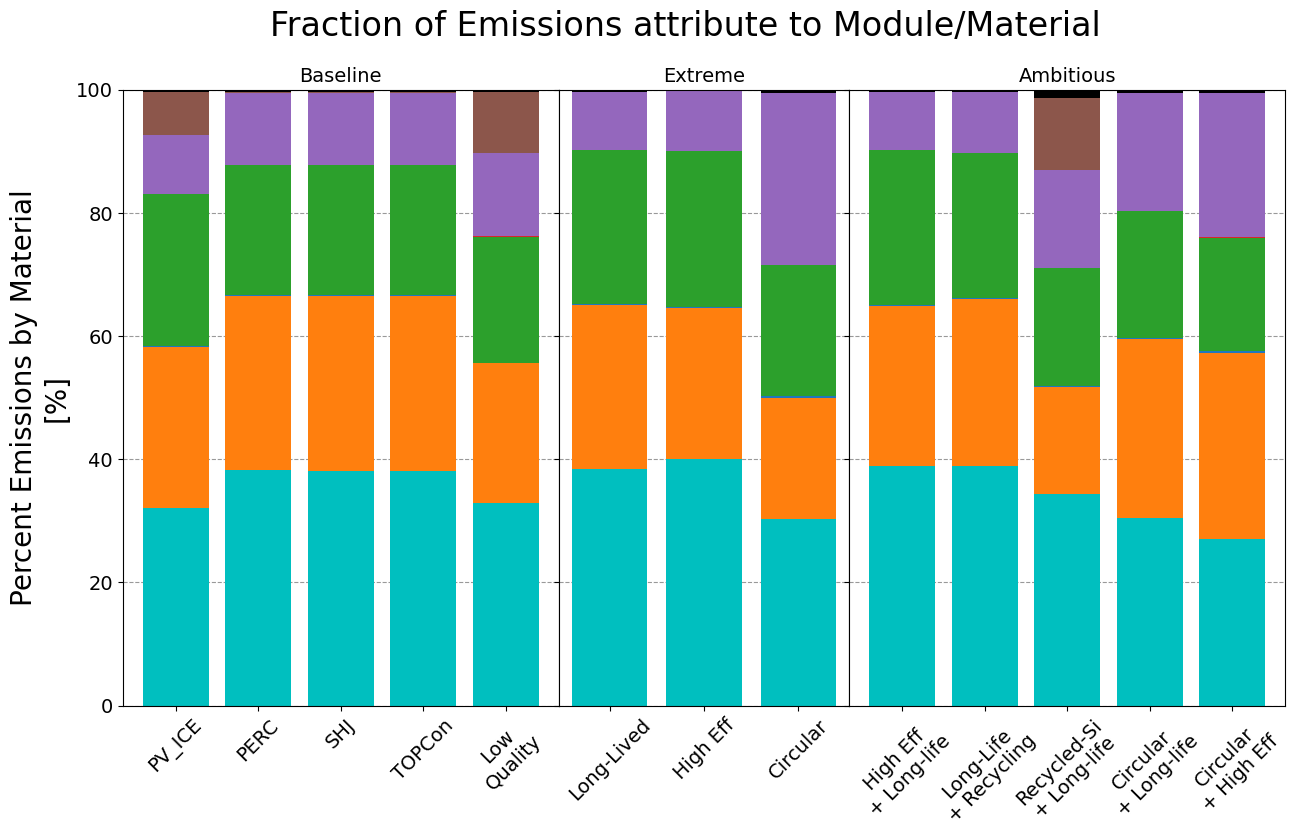

In [241]:
fig_cumuemit_modmat, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[0])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silicon'],
        bottom=fraction_modmats_cumu_emit[0:5]['glass'], color=colormats[1])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:2].sum(axis=1), color=colormats[2])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:3].sum(axis=1), color=colormats[3])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:4].sum(axis=1), color=colormats[4])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:5].sum(axis=1), color=colormats[5])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:6].sum(axis=1), color=colormats[6])
ax0.bar(scennames_labels[0:5], fraction_modmats_cumu_emit[0:5]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[0:5,0:7].sum(axis=1), color='black')

ax0.set_ylim(0,100)
ax0.set_ylabel('Percent Emissions by Material\n[%]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[0])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silicon'],
        bottom=fraction_modmats_cumu_emit[5:8]['glass'], color=colormats[1])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:2].sum(axis=1), color=colormats[2])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:3].sum(axis=1), color=colormats[3])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:4].sum(axis=1), color=colormats[4])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:5].sum(axis=1), color=colormats[5])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:6].sum(axis=1), color=colormats[6])
ax2.bar(scennames_labels[5:8], fraction_modmats_cumu_emit[5:8]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[5:8,0:7].sum(axis=1), color='black')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['glass'], color=colormats[0])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silicon'],
        bottom=fraction_modmats_cumu_emit[8:]['glass'], color=colormats[1])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['silver'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:2].sum(axis=1), color=colormats[2])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['aluminium_frames'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:3].sum(axis=1), color=colormats[3])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['copper'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:4].sum(axis=1), color=colormats[4])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['encapsulant'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:5].sum(axis=1), color=colormats[5])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['backsheet'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:6].sum(axis=1), color=colormats[6])
ax3.bar(scennames_labels[8:], fraction_modmats_cumu_emit[8:]['module'],
       bottom=fraction_modmats_cumu_emit.iloc[8:,0:7].sum(axis=1), color='black')


ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumuemit_modmat.suptitle('Fraction of Emissions attribute to Module/Material', fontsize=24)
plt.show()

#fig_cumuemit_modmat.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Cumulative Carbon in 2050 and 2100

In [242]:
#mins in 2050 and 2100
cumu_carbon_2050 = sim_cumu_carbon.loc[2050].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_2100 = sim_cumu_carbon.loc[2100].filter(like='Annual_Emit_total_modmats')/1e12
cumu_carbon_rankings_crittime = pd.concat([cumu_carbon_2050,cumu_carbon_2100], axis=1)
cumu_carbon_rankings_crittime.index = scennames_labels_flat
cumu_carbon_rankings_crittime_bmt = cumu_carbon_rankings_crittime/1000
round(cumu_carbon_rankings_crittime_bmt,1)

2050  2100
PV_ICE                   15.3  32.0
PERC                     13.9  24.1
SHJ                      13.3  23.0
TOPCon                   13.5  23.5
Low Quality              16.8  35.7
Long-Lived               14.5  25.5
High Eff                 11.9  32.8
Circular                 19.3  30.0
High Eff + Long-life     12.3  24.9
Long-Life + Recycling    14.6  25.5
Recycled-Si + Long-life  15.8  26.6
Circular + Long-life     20.1  29.4
Circular + High Eff      16.9  25.9

In [243]:
cumu_carbon_rankings_crittime_plot = cumu_carbon_rankings_crittime.copy()
cumu_carbon_rankings_crittime_plot['diff'] = cumu_carbon_rankings_crittime[2100]-cumu_carbon_rankings_crittime[2050]

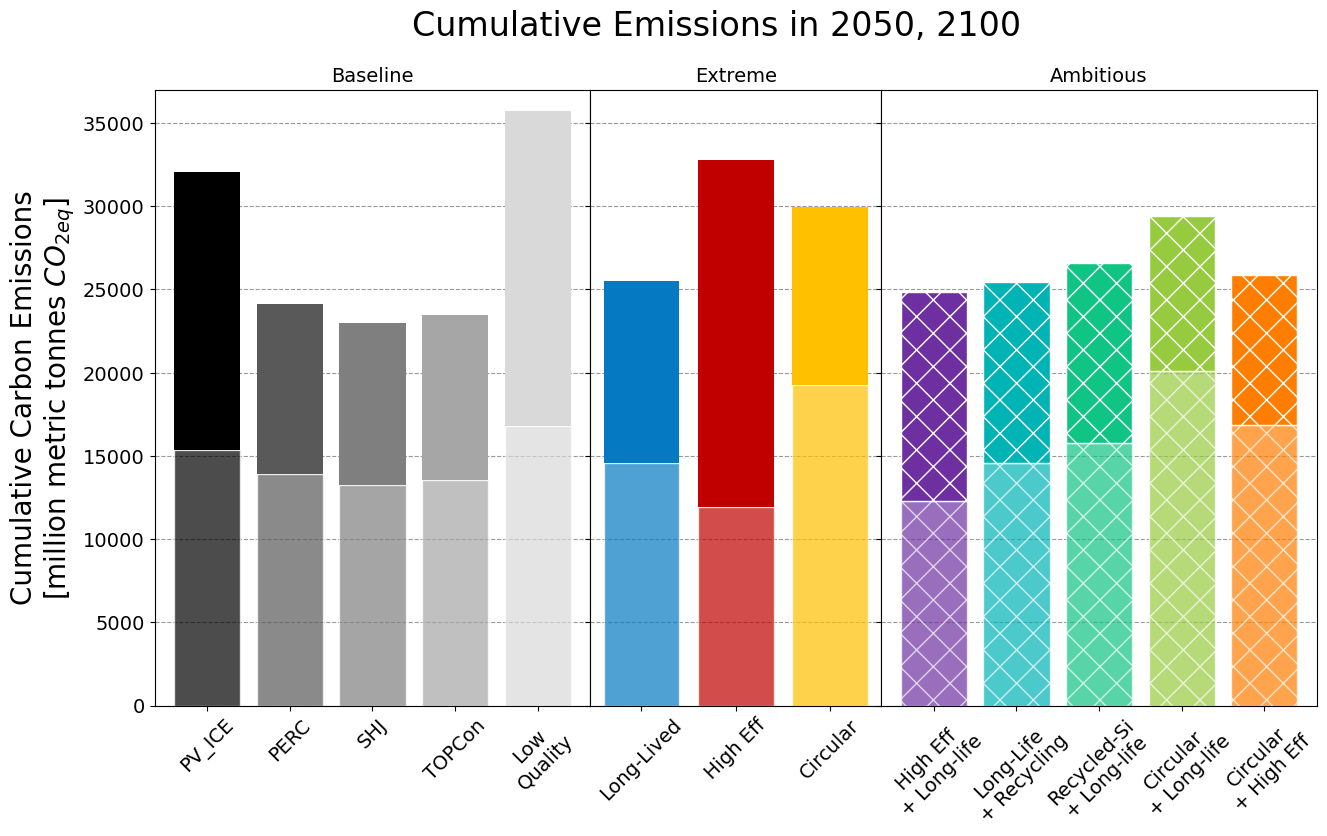

In [244]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5], alpha = 0.7, edgecolor='white')
ax0.bar(cumu_carbon_rankings_crittime_plot.index[0:5], cumu_carbon_rankings_crittime_plot['diff'].iloc[0:5],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[0:5],
        tick_label=scennames_labels[0:5], color=colorpalette[0:5])
ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8], alpha = 0.7, edgecolor='white')
ax2.bar(cumu_carbon_rankings_crittime_plot.index[5:8], cumu_carbon_rankings_crittime_plot['diff'].iloc[5:8],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[5:8],
        tick_label=scennames_labels[5:8], color=colorpalette[5:8])
ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white', alpha=0.7)
ax3.bar(cumu_carbon_rankings_crittime_plot.index[8:], cumu_carbon_rankings_crittime_plot['diff'].iloc[8:],
        bottom=cumu_carbon_rankings_crittime_plot[2050].iloc[8:],
        tick_label=scennames_labels[8:], color=colorpalette[8:], hatch='x', edgecolor='white')
ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig

fig_cumulativeemit.suptitle('Cumulative Emissions in 2050, 2100', fontsize=24)
plt.show()

fig_cumulativeemit.savefig(os.path.join(testfolder,'carbonresults_CUMU20502100.png'), dpi=300, bbox_inches='tight')

# 

# Emissions by electricity vs fuels vs process
## Process emission summing
 This only happens on the material files

In [245]:
process_emissions = pd.DataFrame()
for scen in scenarios:
    scen_p = sim_carbon_dfs.filter(like=scen).filter(like='_p_')
    scen_p_sum = scen_p.sum(axis=1)
    process_emissions = pd.concat([process_emissions,scen_p_sum], axis=1)

process_emissions.columns = scennames_labels_flat
process_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
process_emissions_cumu = process_emissions.cumsum()

In [246]:
#process_emissions_cumu

## Fuel Emissions
This is capturing steam and heating fuel, also only on material level

In [247]:
fuel_emissions = pd.DataFrame()
for scen in scenarios:
    scen_f = sim_carbon_dfs.filter(like=scen).filter(like='_fuel_')
    scen_f_sum = scen_f.sum(axis=1)
    fuel_emissions = pd.concat([fuel_emissions,scen_f_sum], axis=1)
    
fuel_emissions.columns = scennames_labels_flat
fuel_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
fuel_emissions_cumu = fuel_emissions.cumsum()

In [248]:
#fuel_emissions_cumu

## Electricity Emissions
both module and material level elec.

In [249]:
elec_emissions = pd.DataFrame()
for scen in scenarios:
    scen_mod_elec = sim_carbon_dfs.filter(like=scen).filter(like='Global_mod_MFG') #module elec lifecycle emits
    
    #material elec emits
    mat_eleckey = ['Global_vmfg_elec','landfill_elec','ReMFG_clean_elec','Recycled_LQ_elec','Recycled_HQ_elec']
    mat_elecs_search = '|'.join(mat_eleckey)
    scen_mat_elecs = sim_carbon_dfs.loc[:,sim_carbon_dfs.columns.str.contains(mat_elecs_search)].filter(like=scen)
    scen_mat_elecs_sum = scen_mat_elecs.sum(axis=1)
    
    #sum them together by scen
    scen_elec_modmat_annual_sum = scen_mat_elecs_sum+scen_mod_elec.iloc[:,0]
    elec_emissions = pd.concat([elec_emissions,scen_elec_modmat_annual_sum], axis=1)
    
elec_emissions.columns=scennames_labels_flat
elec_emissions.index = pd.RangeIndex(start=2000,stop=2101,step=1)
elec_emissions_cumu = elec_emissions.cumsum()

In [250]:
#graphing by emission source
efp_emit_total = elec_emissions+fuel_emissions+process_emissions
efp_emit_total_cumu = elec_emissions_cumu+fuel_emissions_cumu+process_emissions_cumu

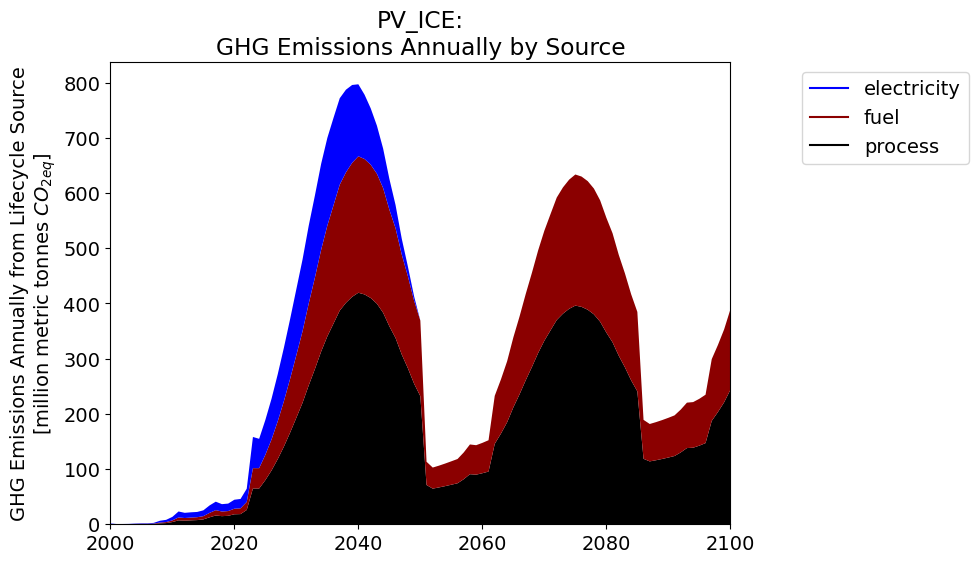

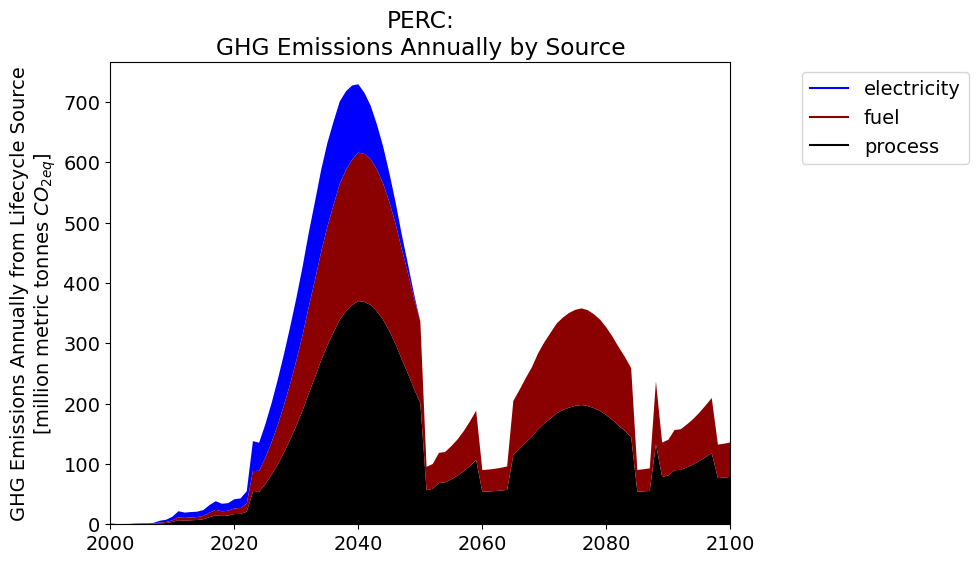

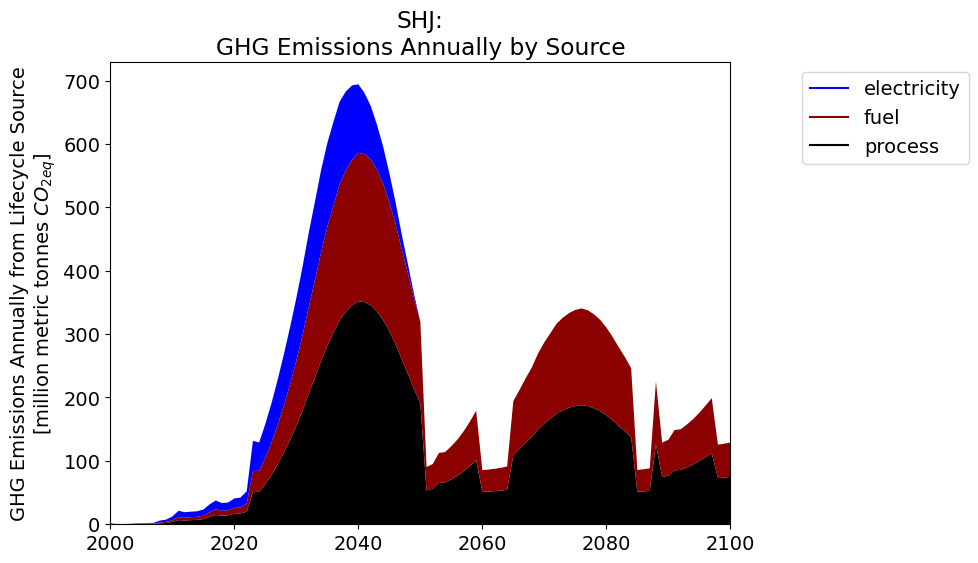

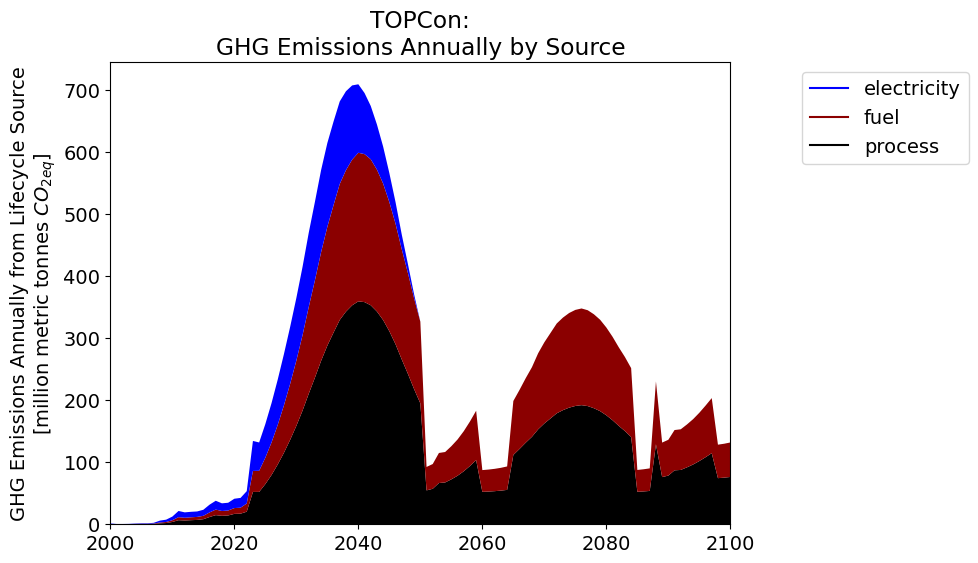

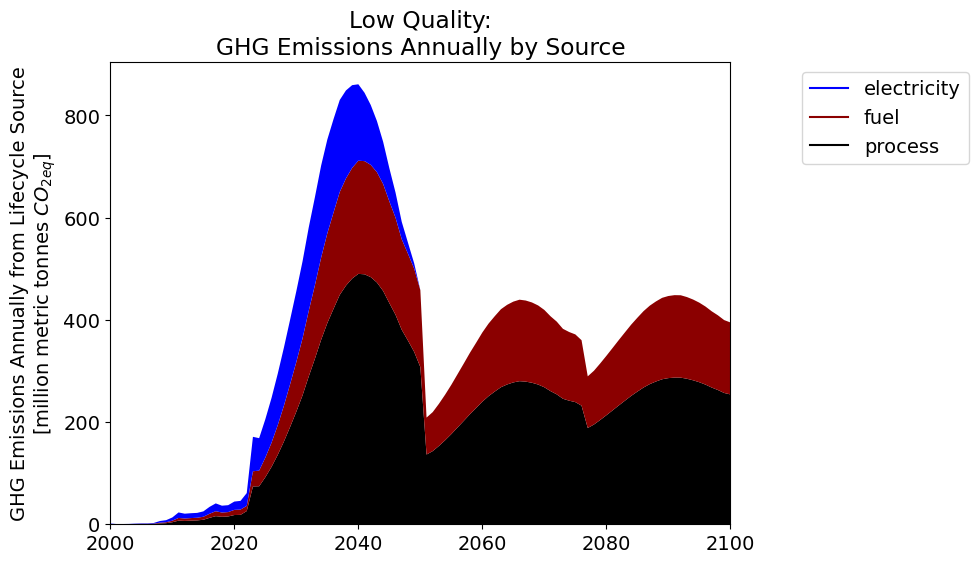

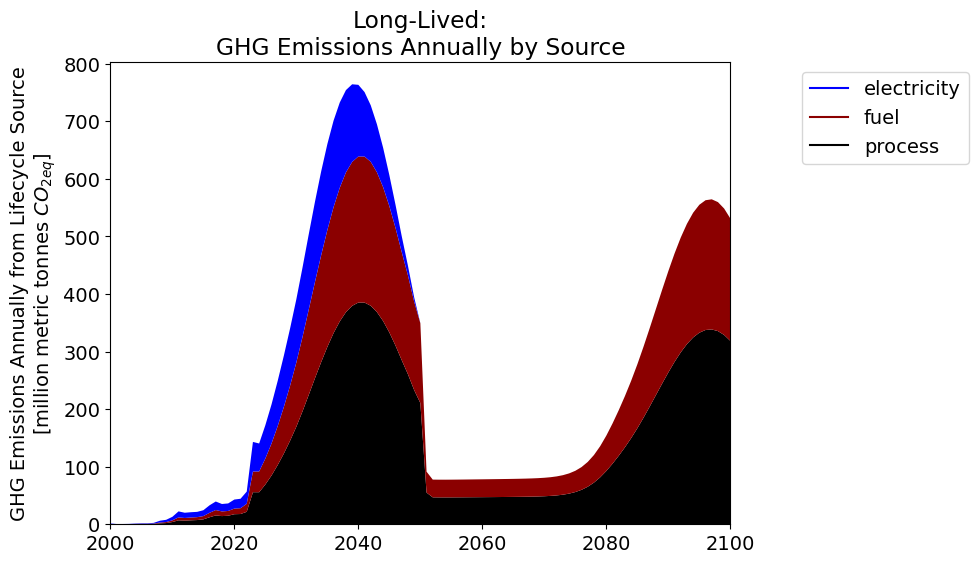

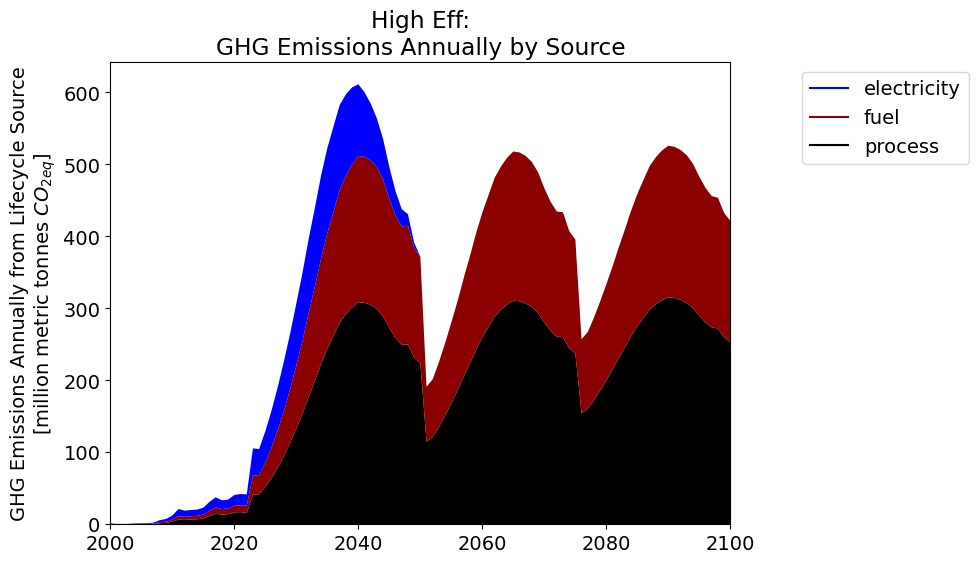

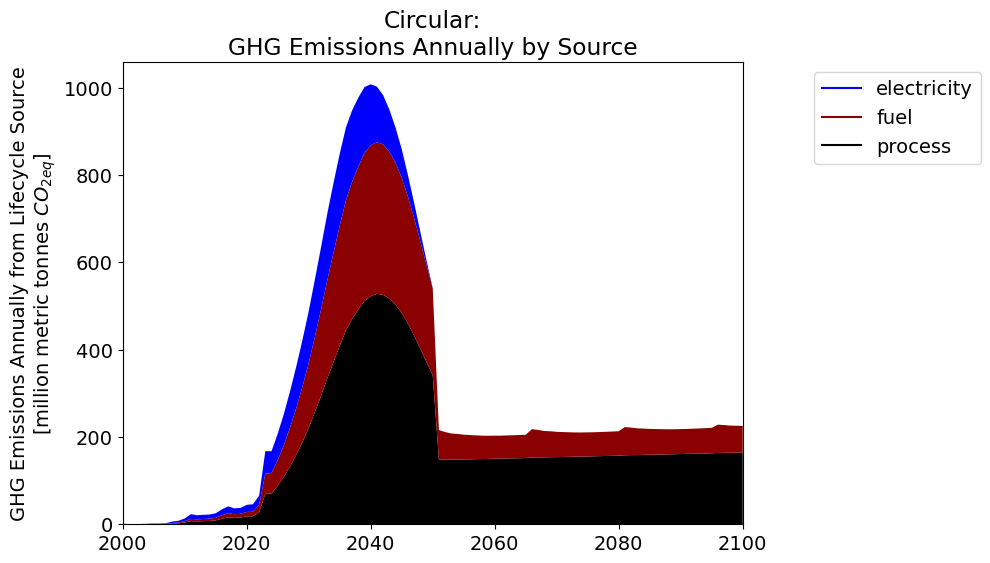

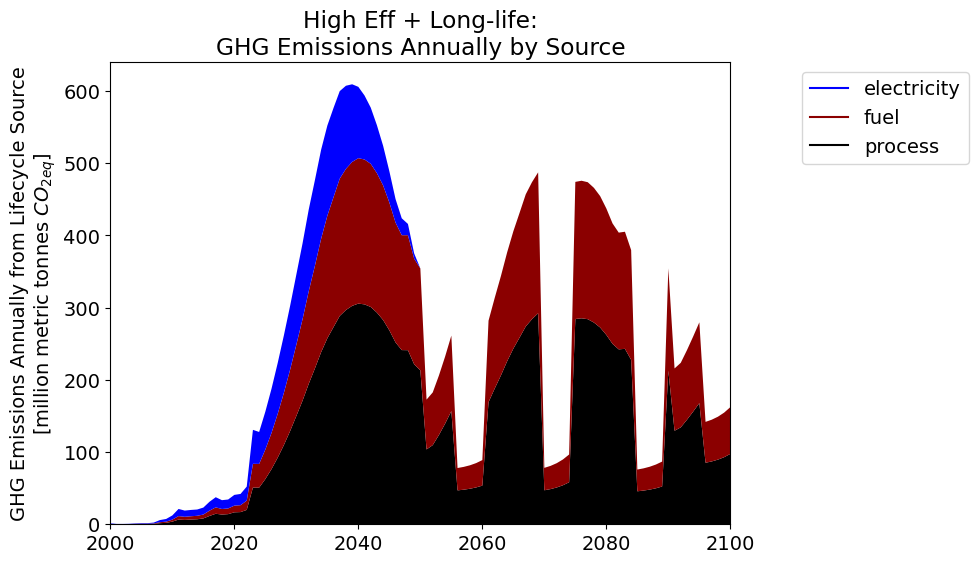

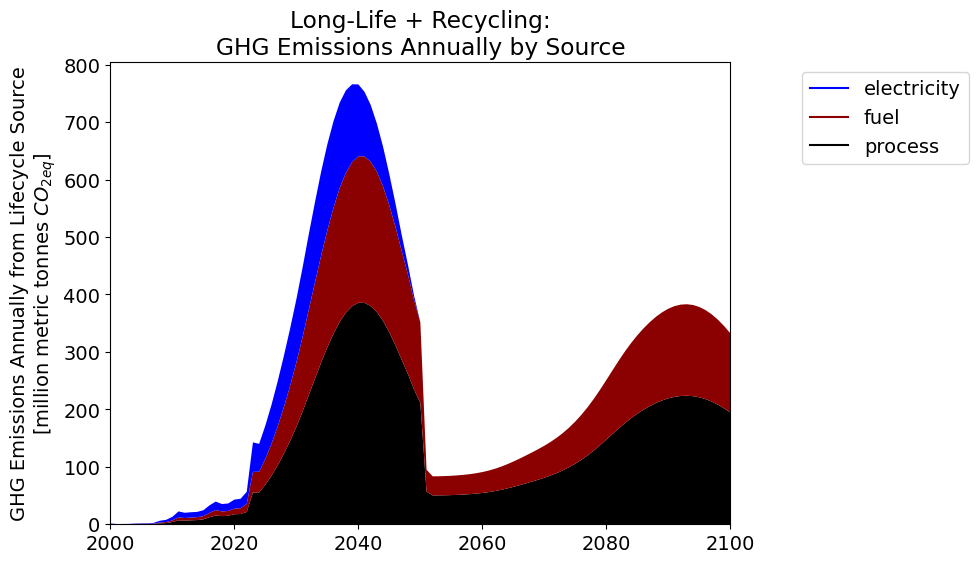

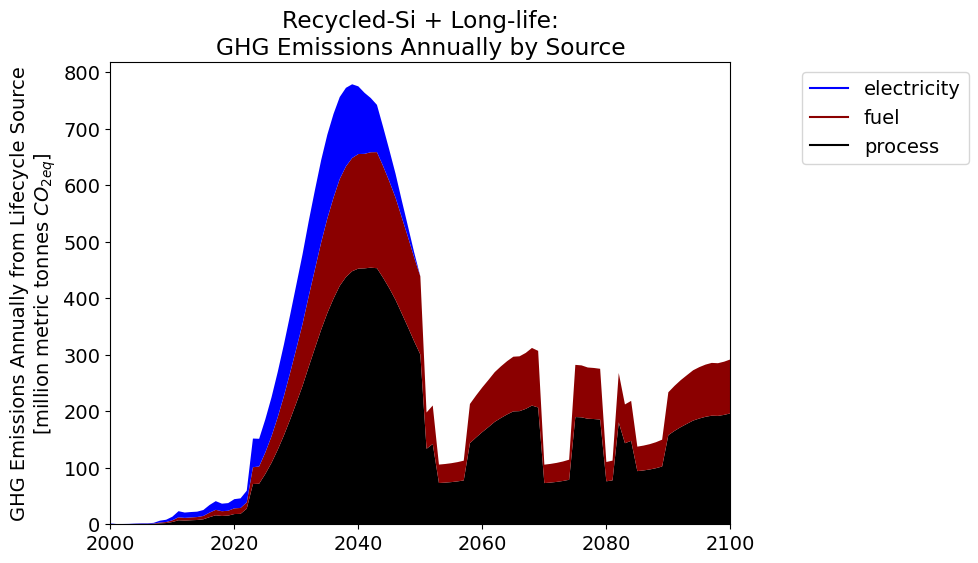

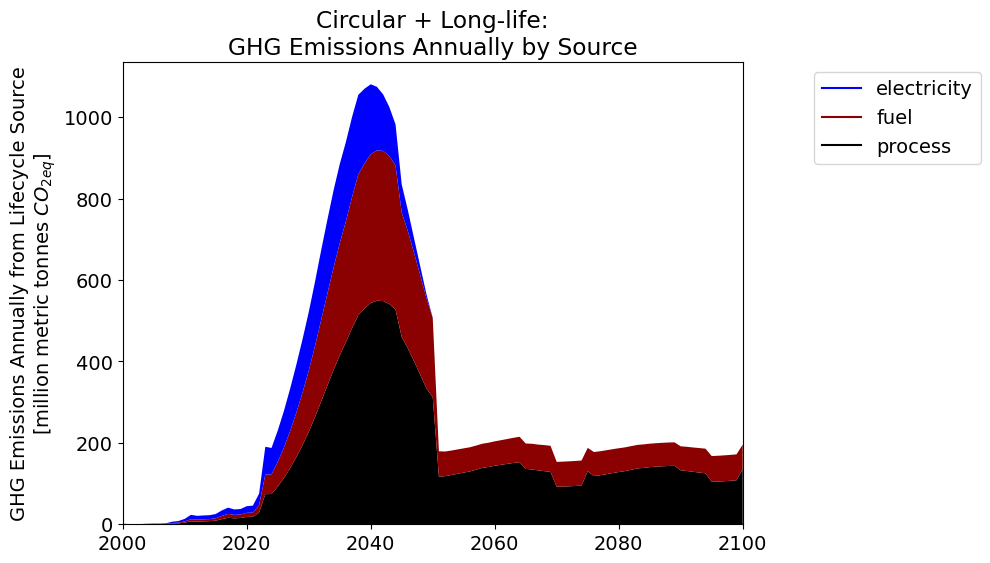

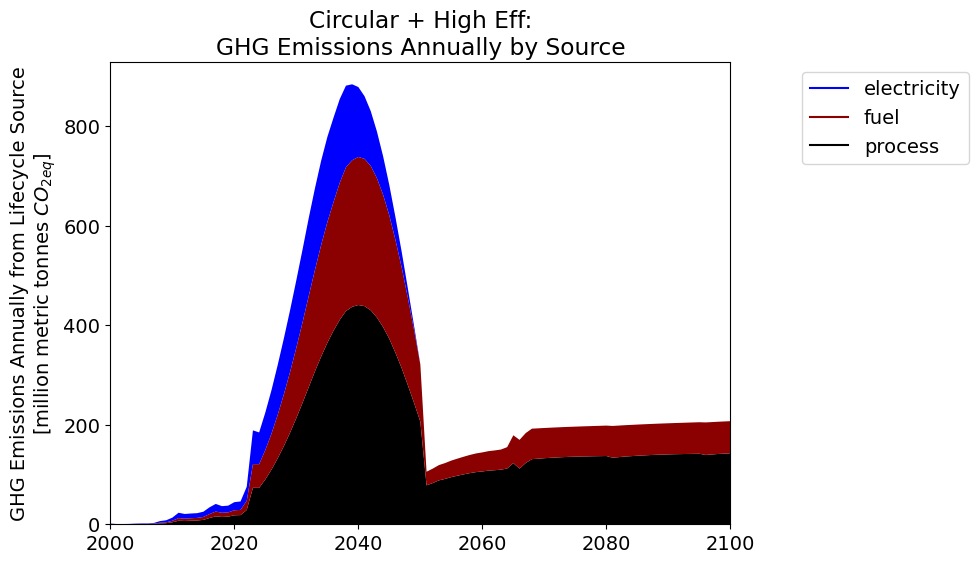

In [251]:
#graphing by emission source, annual
#efp_emit_total = elec_emissions+fuel_emissions+process_emissions

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions.index,
                  process_emissions[scen]/1e12, 
                  fuel_emissions[scen]/1e12,
                  elec_emissions[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Annually by Source')
    plt.ylabel('GHG Emissions Annually from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.4,1))
    #plt.grid(axis='both', which='both', color='0.9', ls='--', zorder=0)
    #plt.set_axisbelow(True)
#plt.legend()
    plt.show()

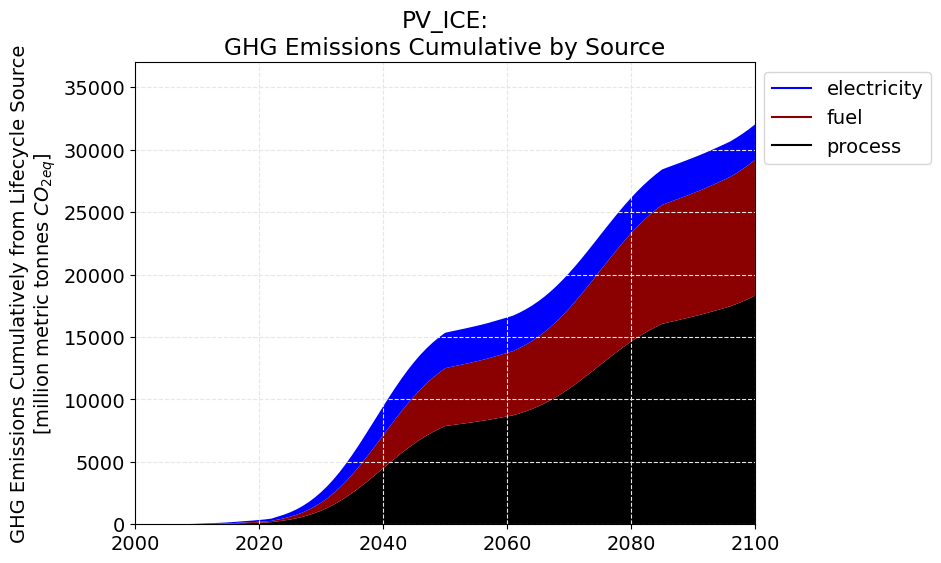

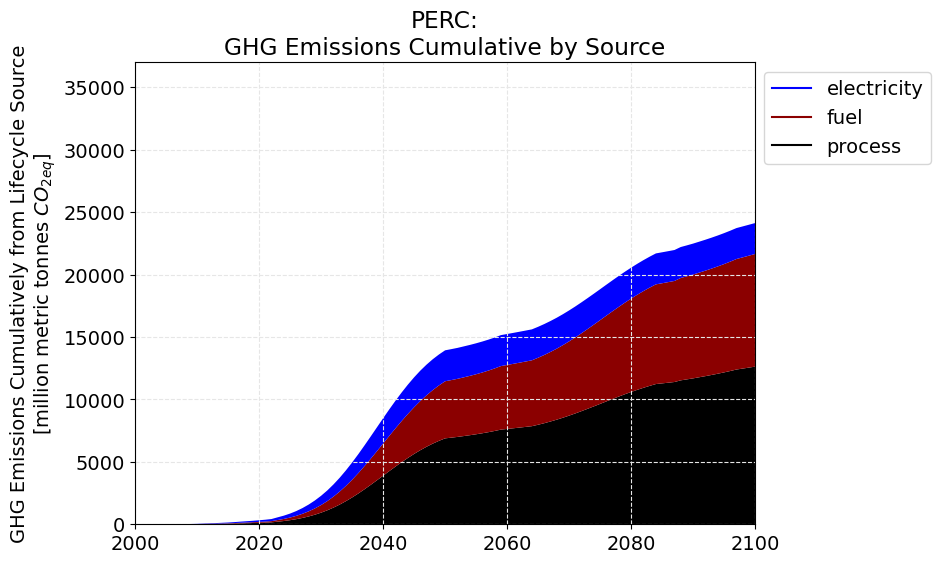

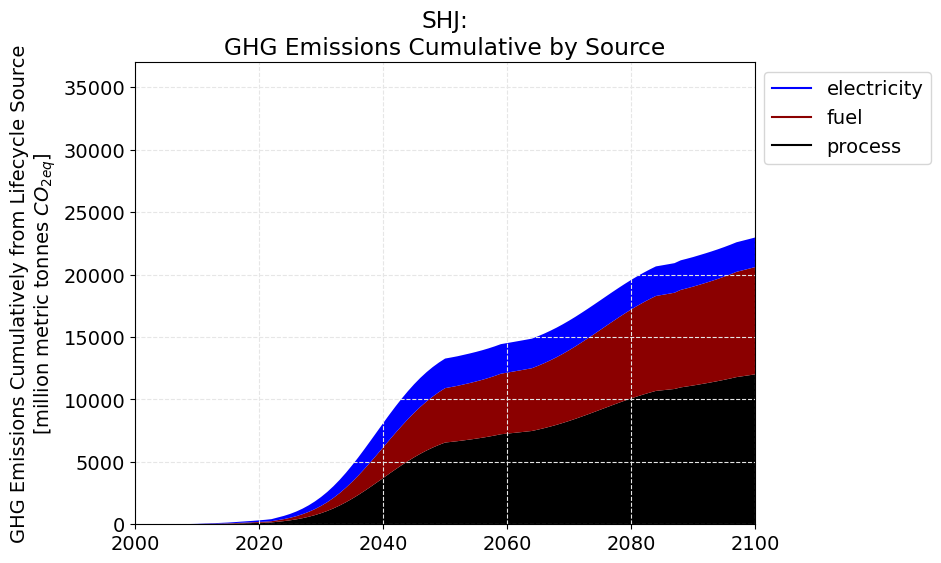

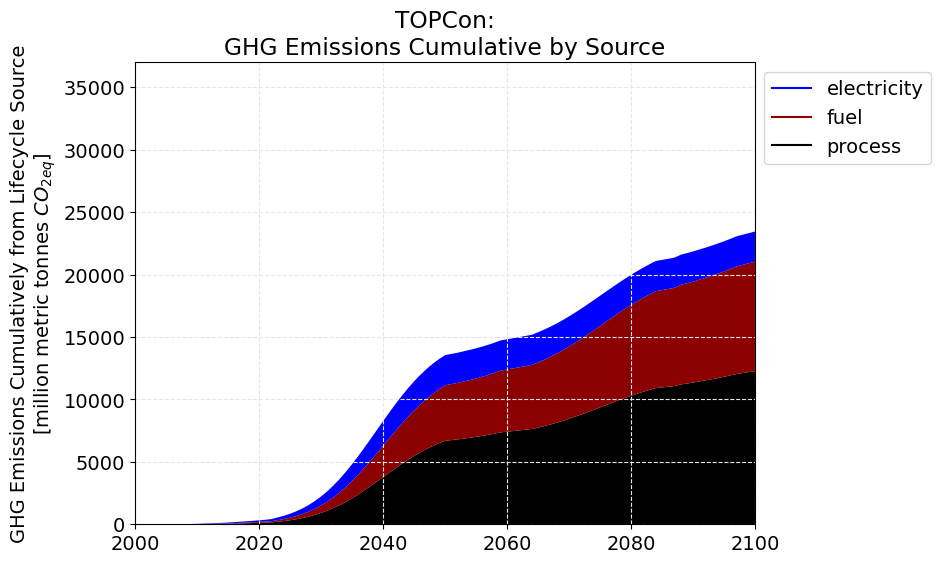

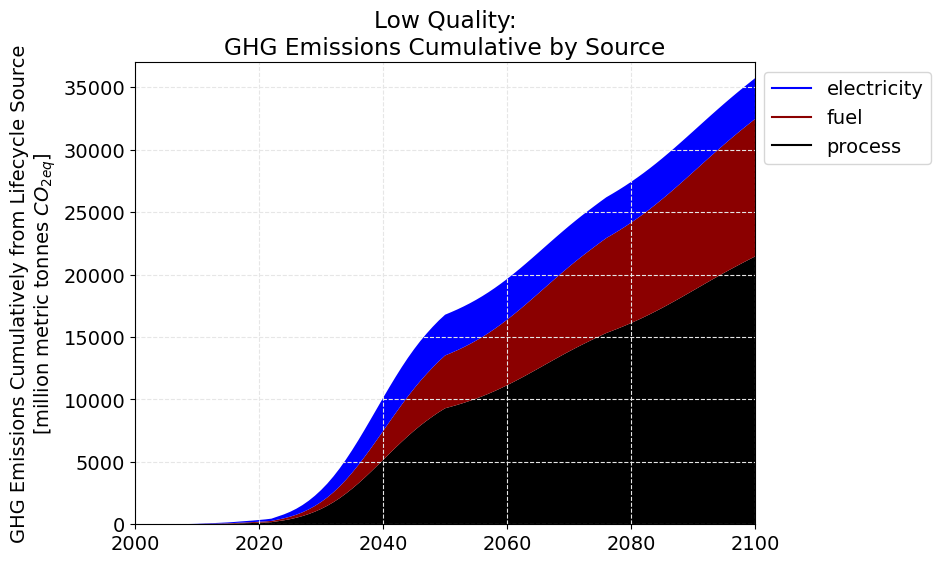

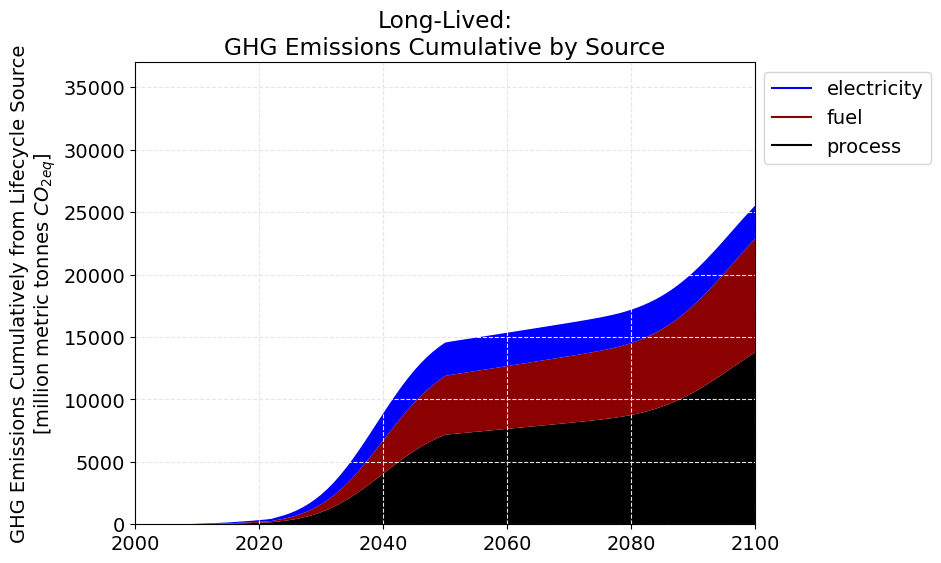

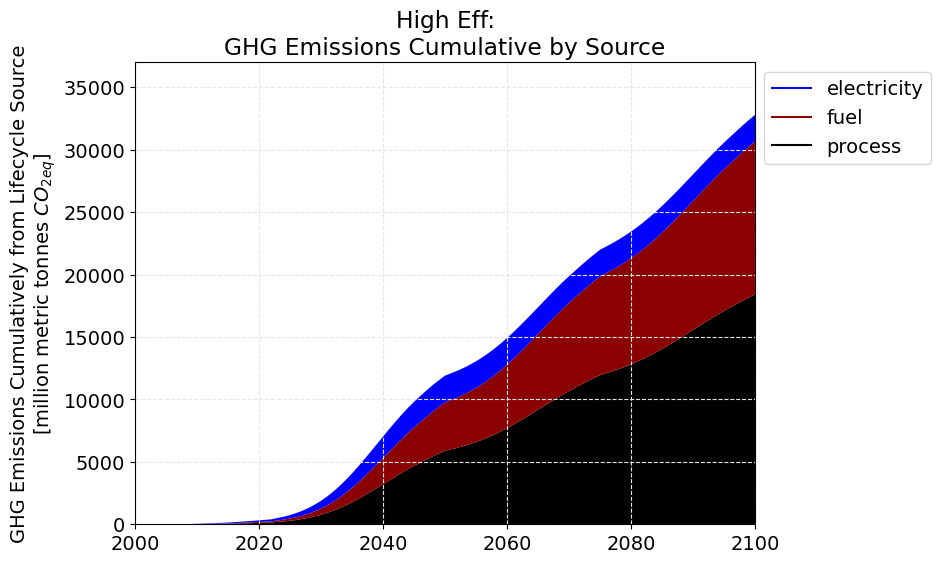

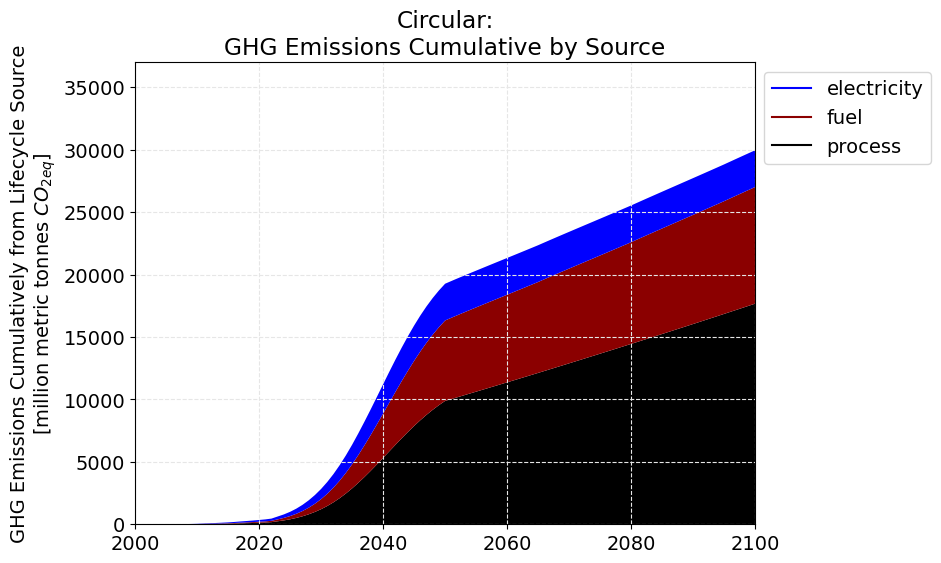

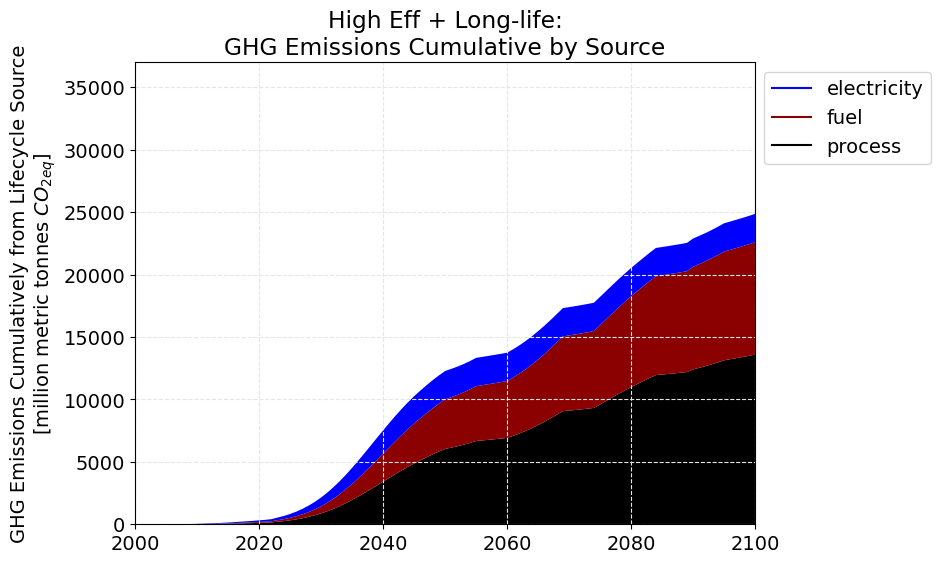

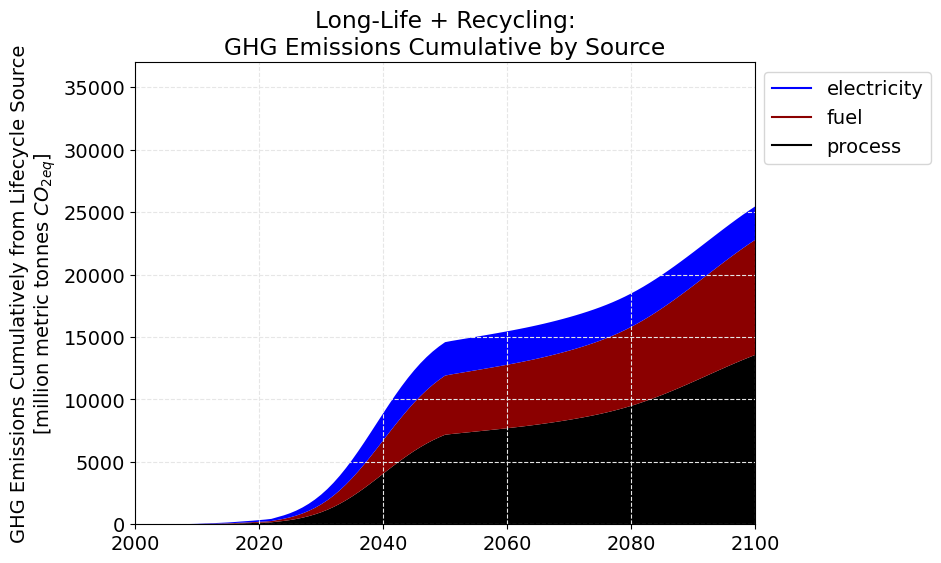

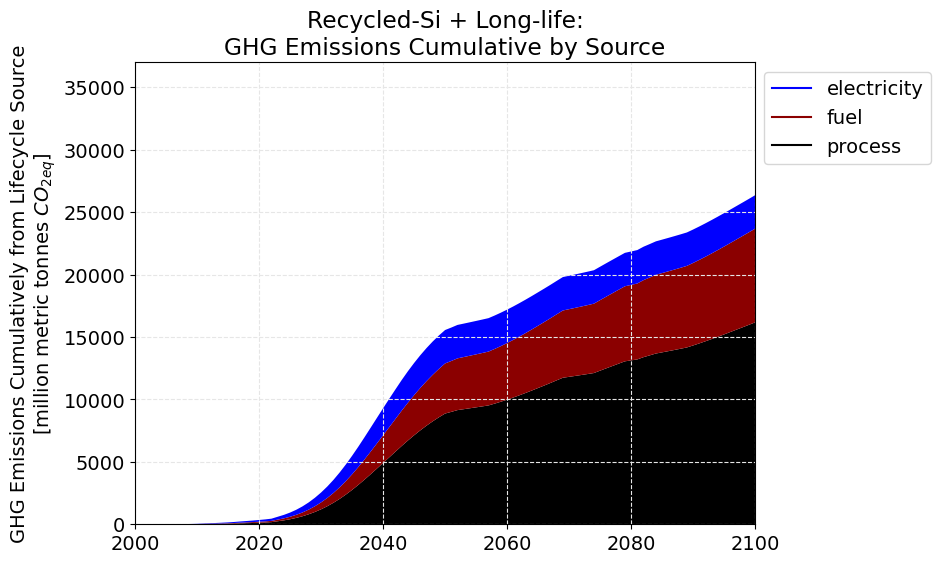

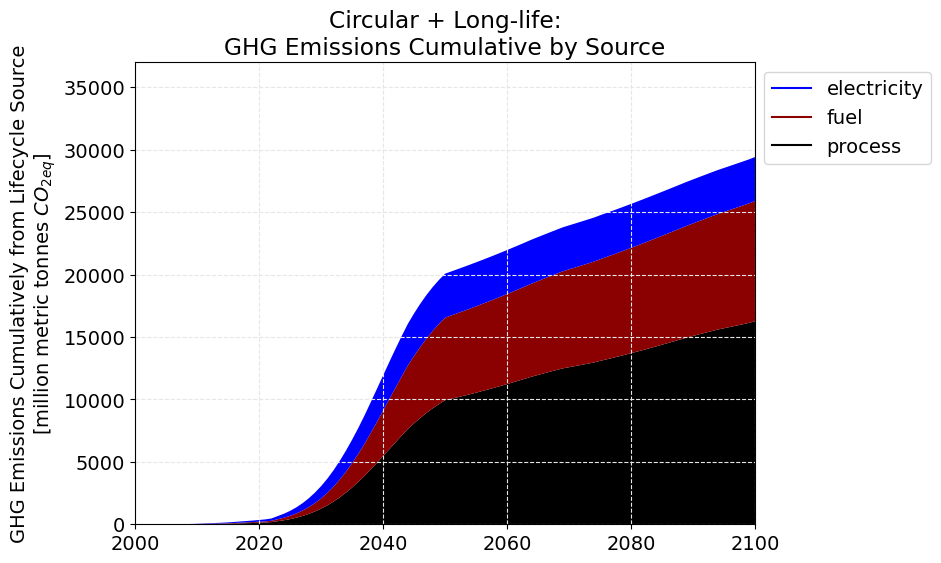

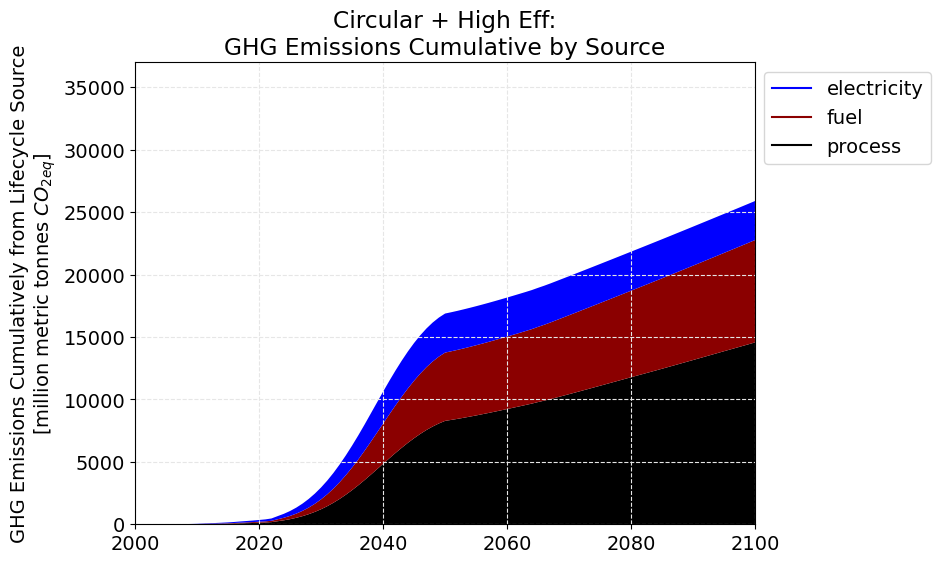

In [252]:
#graphing by emission source, cumulative

for scen in scennames_labels_flat:
    
    plt.plot([],[],color='black', label='process')
    plt.plot([],[],color='darkred', label='fuel')
    plt.plot([],[],color='blue', label='electricity')

    plt.stackplot(elec_emissions_cumu.index,
                  process_emissions_cumu[scen]/1e12, 
                  fuel_emissions_cumu[scen]/1e12,
                  elec_emissions_cumu[scen]/1e12, 
                  colors = ['black','darkred','blue'])
    plt.title(scen+':\nGHG Emissions Cumulative by Source')
    plt.ylabel('GHG Emissions Cumulatively from Lifecycle Source\n[million metric tonnes $CO_{2eq}$]')
    plt.xlim(2000,2100)
    plt.ylim(0,maxy+1000)

    handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
#order = [1,2,0]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3,1))
    plt.grid(axis='both', which='both', color='0.9', ls='--')
#plt.legend()
    plt.show()

In [253]:
#bar chart 2050 and 2100 by scenario by emission source
emit_efp_2100_forbar = pd.concat([elec_emissions_cumu.loc[2100],fuel_emissions_cumu.loc[2100],process_emissions_cumu.loc[2100]],
                                 axis=1,keys=['electricity','fuel','process'])

In [254]:
emit_efp_2100_mmt = emit_efp_2100_forbar/1e12

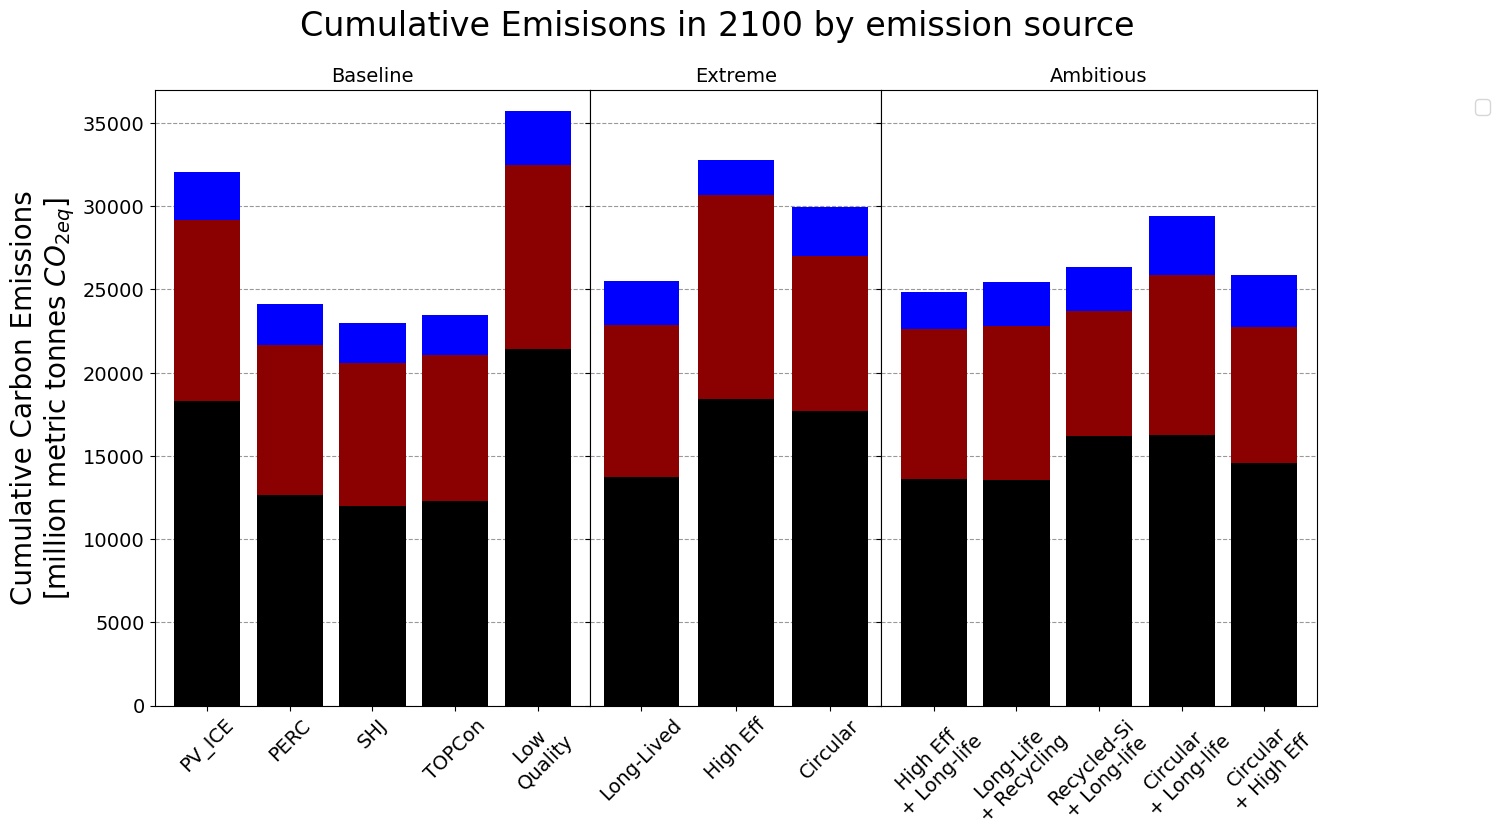

In [255]:

fig_cumulativeemit, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['process'].iloc[0:5],label='process',
        tick_label=scennames_labels[0:5], color='black')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['fuel'].iloc[0:5],label='fuel',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkred')

ax0.bar(emit_efp_2100_mmt.index[0:5], emit_efp_2100_mmt['electricity'].iloc[0:5],label='electricity',
        bottom=emit_efp_2100_mmt['process'].iloc[0:5]+emit_efp_2100_mmt['fuel'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='blue')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['process'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='black')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['fuel'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkred')

ax2.bar(emit_efp_2100_mmt.index[5:8], emit_efp_2100_mmt['electricity'].iloc[5:8],
        bottom=emit_efp_2100_mmt['process'].iloc[5:8]+emit_efp_2100_mmt['fuel'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='blue')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['process'].iloc[8:],
        tick_label=scennames_labels[8:], color='black')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['fuel'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkred')

ax3.bar(emit_efp_2100_mmt.index[8:], emit_efp_2100_mmt['electricity'].iloc[8:],
        bottom=emit_efp_2100_mmt['process'].iloc[8:]+emit_efp_2100_mmt['fuel'].iloc[8:],
        tick_label=scennames_labels[8:], color='blue')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_cumulativeemit.suptitle('Cumulative Emisisons in 2100 by emission source', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.42,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# vMFG versus Circular Processes
3 categories for this:
- vmfg of materials
- CE of materials and materials
- install/decomission requirements 
and I think module mfging falls into the last category

In [256]:
CEkey = ['ReMFG','Recycle_Crush','Recycled_LQ','Recycled_HQ','Resell','Repair','LQ','HQ']
CEkey_search = '|'.join(CEkey)

LinearKey = ['vMFG', 'vmfg', 'landfill']
LinearKey_search = '|'.join(LinearKey)

otherkey = ['mod_MFG','OandM','Install','Demount', 'Store'] #THIS ONE IS MISSING COLUMNS!!!
otherkey_search = '|'.join(otherkey)

scen_carbon_CE.columns

scen_carbon_linear.columns

scen_carbon_other.columns

allcolumns = list(scen_annual_carbon.columns)
selectedcolumns = list(scen_carbon_other.columns)+list(scen_carbon_linear.columns)+list(scen_carbon_CE.columns)
selectedcolumns

set(allcolumns).difference(selectedcolumns)

In [257]:
#subset by pathways
sim_carbon_CE = pd.DataFrame()
sim_carbon_linear = pd.DataFrame()
sim_carbon_necessary = pd.DataFrame()

for scen in scenarios:
    scen_annual_carbon = sim_annual_carbon.filter(like=scen)
    
    scen_carbon_CE = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(CEkey_search)]
    scen_carbon_CE_sum = scen_carbon_CE.sum(axis=1)
    sim_carbon_CE = pd.concat([sim_carbon_CE, scen_carbon_CE_sum], axis=1)
    
    scen_carbon_linear = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(LinearKey_search)]
    scen_carbon_linear_sum = scen_carbon_linear.sum(axis=1)
    sim_carbon_linear = pd.concat([sim_carbon_linear,scen_carbon_linear_sum ], axis=1)
    
    scen_carbon_other = scen_annual_carbon.loc[:,scen_annual_carbon.columns.str.contains(otherkey_search)]
    scen_carbon_other_sum = scen_carbon_other.sum(axis=1)
    sim_carbon_necessary = pd.concat([sim_carbon_necessary, scen_carbon_other_sum], axis=1)
    
sim_carbon_CE.columns = scennames_labels_flat
sim_carbon_linear.columns = scennames_labels_flat
sim_carbon_necessary.columns = scennames_labels_flat

#.index = pd.RangeIndex(start=2000,stop=2101,step=1)

In [258]:
sim_carbon_CE_cumu = sim_carbon_CE.cumsum()
sim_carbon_linear_cumu = sim_carbon_linear.cumsum()
sim_carbon_necessary_cumu = sim_carbon_necessary.cumsum()

In [259]:
emit_pathway = pd.concat([sim_carbon_CE_cumu.loc[2100],sim_carbon_linear_cumu.loc[2100],sim_carbon_necessary_cumu.loc[2100]],
                                 axis=1,keys=['Circular','Linear/Virgin','Necessary'])
emit_pathway_mmt = emit_pathway/1e12

In [260]:
sim_carbon_CE_cumu

PV_ICE          PERC           SHJ        TOPCon   Low Quality  \
2000  1.243800e+08  1.133821e+08  1.104993e+08  1.119274e+08  1.243800e+08   
2001  1.671031e+08  1.560264e+08  1.531229e+08  1.545612e+08  1.671031e+08   
2002  2.168491e+08  2.025179e+08  1.987614e+08  2.006223e+08  2.168491e+08   
2003  2.898076e+08  2.707032e+08  2.656955e+08  2.681761e+08  2.898039e+08   
2004  4.327494e+08  4.042926e+08  3.968334e+08  4.005285e+08  4.327160e+08   
...            ...           ...           ...           ...           ...   
2096  9.670630e+12  1.573488e+15  1.496899e+15  1.528699e+15  3.048649e+15   
2097  9.812793e+12  1.603712e+15  1.525642e+15  1.558055e+15  3.115547e+15   
2098  9.971351e+12  1.615818e+15  1.537155e+15  1.569813e+15  3.180545e+15   
2099  1.014798e+13  1.628246e+15  1.548973e+15  1.581884e+15  3.243294e+15   
2100  1.034754e+13  1.641126e+15  1.561223e+15  1.594394e+15  3.304882e+15   

        Long-Lived      High Eff      Circular  High Eff + Long-life  \
2000  1.186951e+08  1.102168e+08  1.243800e+08          1.102168e+08   
2001  1.613775e+08  1.528384e+08  1.671031e+08          1.528384e+08   
2002  2.094412e+08  1.983933e+08  2.168491e+08          1.983933e+08   
2003  2.799324e+08  2.652048e+08  2.898076e+08          2.652048e+08   
2004  4.180398e+08  3.961025e+08  4.327494e+08          3.961025e+08   
...            ...           ...           ...                   ...   
2096  4.351918e+10  4.124697e+10  1.931687e+15          4.124697e+10   
2097  4.351918e+10  4.124697e+10  1.957287e+15          4.124697e+10   
2098  4.351918e+10  4.124697e+10  1.983421e+15          4.124697e+10   
2099  4.351918e+10  4.124697e+10  2.009839e+15          4.124697e+10   
2100  4.351918e+10  4.124697e+10  2.036589e+15          4.124697e+10   

      Long-Life + Recycling  Recycled-Si + Long-life  Circular + Long-life  \
2000           1.186951e+08             1.243800e+08          1.243800e+08   
2001           1.613775e+08             1.671031e+08          1.671031e+08   
2002           2.094412e+08             2.168491e+08          2.168491e+08   
2003           2.799324e+08             2.898076e+08          2.898076e+08   
2004           4.180398e+08             4.327494e+08          4.327494e+08   
...                     ...                      ...                   ...   
2096           2.468899e+14             2.274649e+15          1.053526e+15   
2097           2.588737e+14             2.342792e+15          1.061050e+15   
2098           2.704718e+14             2.410676e+15          1.068903e+15   
2099           2.816133e+14             2.479532e+15          1.077202e+15   
2100           2.922333e+14             2.549814e+15          1.096187e+15   

      Circular + High Eff  
2000         1.243800e+08  
2001         1.671031e+08  
2002         2.168491e+08  
2003         2.898076e+08  
2004         4.327494e+08  
...                   ...  
2096         1.149886e+15  
2097         1.168394e+15  
2098         1.187402e+15  
2099         1.206669e+15  
2100         1.226242e+15  

[101 rows x 13 columns]

In [261]:
#emit_pathway.sum(axis=1) #check that matches, we're good
emit_pathway_mmt

Circular  Linear/Virgin   Necessary
PV_ICE                     10.347537   31915.729680  102.295652
PERC                     1641.125975   22389.535967   93.838061
SHJ                      1561.222574   21315.545872   89.336444
TOPCon                   1594.394473   21765.176241   91.204095
Low Quality              3304.881583   32303.245880  119.952898
Long-Lived                  0.043519   25430.432477   95.722591
High Eff                    0.041247   32721.577893   76.414061
Circular                 2036.589192   27770.494768  146.390627
High Eff + Long-life        0.041247   24777.586067   80.991964
Long-Life + Recycling     292.233275   25065.419312   96.297185
Recycled-Si + Long-life  2549.814266   23683.755176  356.503674
Circular + Long-life     1096.187470   28182.485670  137.917844
Circular + High Eff      1226.242395   24540.416674  124.775728

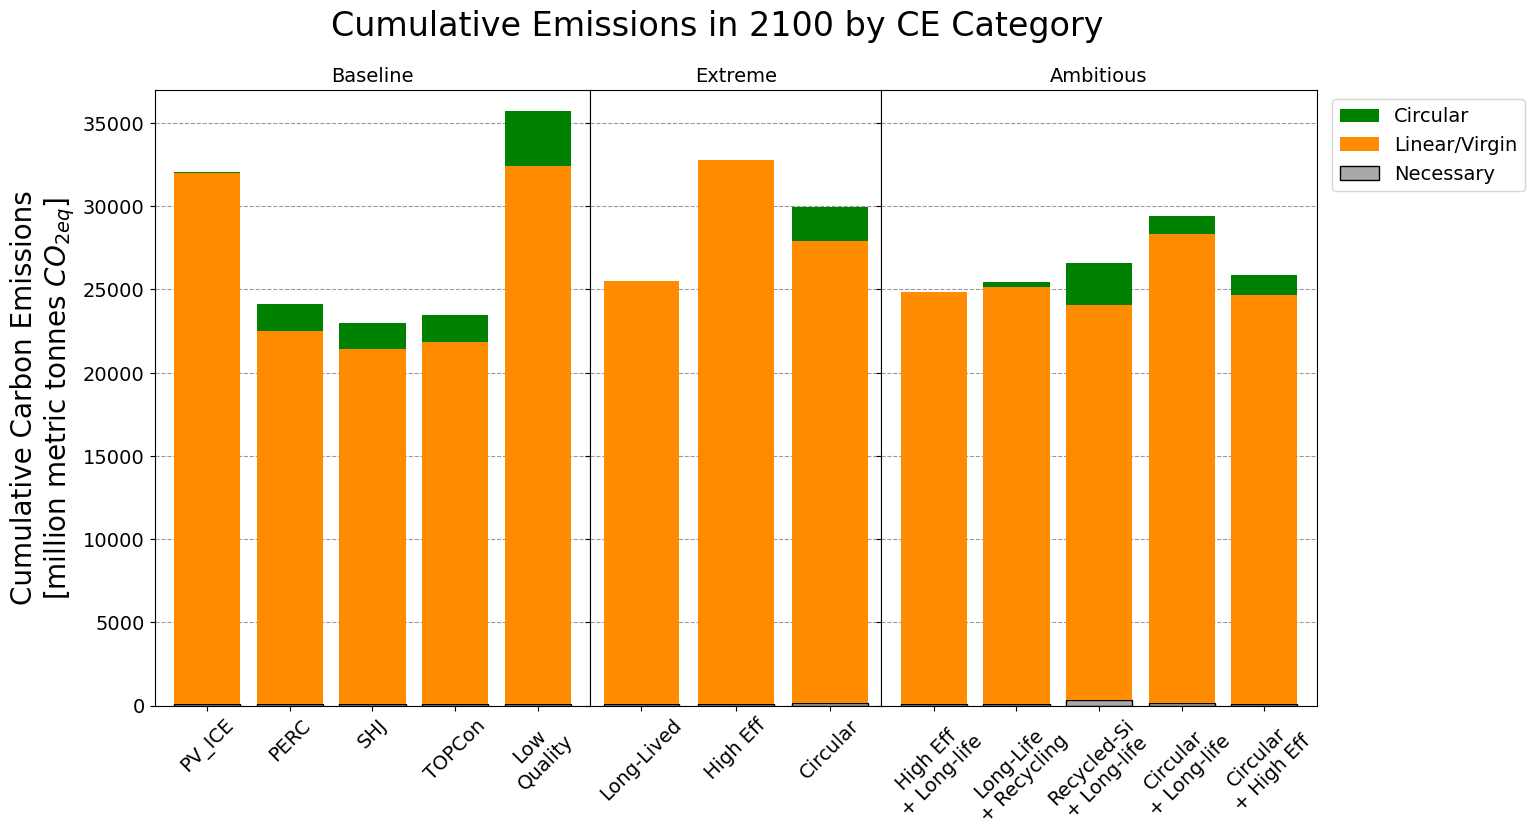

In [262]:

fig_emitByPathway, (ax0,ax2,ax3) = plt.subplots(1,3,figsize=(15,8), sharey=True, 
                                      gridspec_kw={'wspace': 0, 'width_ratios': [1.5,1,1.5]})
#BAU
ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Necessary'].iloc[0:5],label='Necessary',
        tick_label=scennames_labels[0:5], color='darkgray', edgecolor='black')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Linear/Virgin'].iloc[0:5],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5], 
        tick_label=scennames_labels[0:5], color='darkorange')

ax0.bar(emit_pathway_mmt.index[0:5], emit_pathway_mmt['Circular'].iloc[0:5],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[0:5]+emit_pathway_mmt['Linear/Virgin'].iloc[0:5],
        tick_label=scennames_labels[0:5], color='green')

ax0.set_ylim(0,maxy+1000)
ax0.set_ylabel('Cumulative Carbon Emissions\n[million metric tonnes $CO_{2eq}$]', fontsize=20)
ax0.set_title('Baseline', fontsize=14)
ax0.set_xticklabels(labels=scennames_labels[0:5], rotation=45)
ax0.grid(axis='y', color='0.6', ls='--') 
ax0.set_axisbelow(True)

#Extreme
ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Necessary'].iloc[5:8],label='Necessary',
        tick_label=scennames_labels[5:8], color='darkgray', edgecolor='black')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Linear/Virgin'].iloc[5:8],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8], 
        tick_label=scennames_labels[5:8], color='darkorange')

ax2.bar(emit_pathway_mmt.index[5:8], emit_pathway_mmt['Circular'].iloc[5:8],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[5:8]+emit_pathway_mmt['Linear/Virgin'].iloc[5:8],
        tick_label=scennames_labels[5:8], color='green')

ax2.set_title('Extreme', fontsize=14)
ax2.set_xticklabels(labels=scennames_labels[5:8], rotation=45)
ax2.grid(axis='y', color='0.6', ls='--') 
ax2.set_axisbelow(True)

#Ambitious
ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Necessary'].iloc[8:],label='Necessary',
        tick_label=scennames_labels[8:], color='darkgray', edgecolor='black')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Linear/Virgin'].iloc[8:],label='Linear/Virgin',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:], 
        tick_label=scennames_labels[8:], color='darkorange')

ax3.bar(emit_pathway_mmt.index[8:], emit_pathway_mmt['Circular'].iloc[8:],label='Circular',
        bottom=emit_pathway_mmt['Necessary'].iloc[8:]+emit_pathway_mmt['Linear/Virgin'].iloc[8:],
        tick_label=scennames_labels[8:], color='green')

ax3.set_title('Ambitious', fontsize=14)
ax3.set_xticklabels(labels=scennames_labels[8:], rotation=45)
ax3.grid(axis='y', color='0.6', ls='--') 
ax3.set_axisbelow(True)

#overall fig
fig_emitByPathway.suptitle('Cumulative Emissions in 2100 by CE Category', fontsize=24)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.5,1))
plt.show()

#fig_eBalance.savefig('energyresults-energyBalance.png', dpi=300, bbox_inches='tight')

# Emissions per Capacity
Trying to quantify the emissions entailed in achieving energy transition target capacities. Our current calculations don't allow a good method of CO2/kWh, but we do know how much it now takes to achieve the first 75 TW then the the next 11 TW will entail a different amount of carbon. This may be a valuable comparison

In [263]:

cumu_carbon_rankings_crittime#.loc[scen,2050]

2050          2100
PV_ICE                   15334.402913  32028.372868
PERC                     13931.390546  24124.500003
SHJ                      13271.021411  22966.104890
TOPCon                   13548.838219  23450.774808
Low Quality              16784.129725  35728.080361
Long-Lived               14549.710638  25526.198587
High Eff                 11907.894289  32798.033201
Circular                 19264.136355  29953.474587
High Eff + Long-life     12273.873646  24858.619278
Long-Life + Recycling    14585.197527  25453.949771
Recycled-Si + Long-life  15795.409039  26590.073117
Circular + Long-life     20069.816625  29416.590984
Circular + High Eff      16877.271493  25891.434797

In [264]:
cumu_carbon_rankings_crittime.index = scenarios #relabel the index for the calc
scen_carbonPERcapacity = pd.DataFrame(index=scenarios)
for scen in scenarios:
    #2050
    scen_effectiveCap_TW = sim1.scenario[scen].dataOut_m.loc[50, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt = cumu_carbon_rankings_crittime.loc[scen,2050]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2050'] = scen_effectiveCap_TW
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2050'] = scen_carbon_mmt
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2050'] = scen_carbon_mmt/scen_effectiveCap_TW
    #2100
    scen_effectiveCap_TW_2100 = sim1.scenario[scen].dataOut_m.loc[100, 'Effective_Capacity_[W]']/1e12
    scen_carbon_mmt_2100 = cumu_carbon_rankings_crittime.loc[scen,2100]
    scen_carbonPERcapacity.loc[scen, 'EffectiveCap_TW_2100'] = scen_effectiveCap_TW_2100
    scen_carbonPERcapacity.loc[scen, 'Carbon_mmt_2100'] = scen_carbon_mmt_2100
    scen_carbonPERcapacity.loc[scen, 'CO2pTW_2100'] = scen_carbon_mmt_2100/scen_effectiveCap_TW_2100
    #marginal increase between 2050 and 2100

In [265]:
round(scen_carbonPERcapacity,0)

EffectiveCap_TW_2050  Carbon_mmt_2050  CO2pTW_2050  \
PV_ICE                             75.0          15334.0        204.0   
r_PERC                             75.0          13931.0        186.0   
r_SHJ                              75.0          13271.0        177.0   
r_TOPCon                           75.0          13549.0        181.0   
r_IRENA                            75.0          16784.0        224.0   
ex_Life                            75.0          14550.0        194.0   
ex_High_eff                        75.0          11908.0        159.0   
ex_Circular                        75.0          19264.0        257.0   
h_EffLife                          75.0          12274.0        164.0   
h_50PERC                           75.0          14585.0        194.0   
h_RecycledPERC                     75.0          15795.0        211.0   
h_Perovskite_life                  75.0          20070.0        268.0   
h_Perovskite_Eff                   75.0          16877.0        225.0   

                   EffectiveCap_TW_2100  Carbon_mmt_2100  CO2pTW_2100  
PV_ICE                             86.0          32028.0        373.0  
r_PERC                             86.0          24125.0        281.0  
r_SHJ                              86.0          22966.0        267.0  
r_TOPCon                           86.0          23451.0        273.0  
r_IRENA                            86.0          35728.0        416.0  
ex_Life                            86.0          25526.0        297.0  
ex_High_eff                        86.0          32798.0        382.0  
ex_Circular                        86.0          29953.0        348.0  
h_EffLife                          86.0          24859.0        289.0  
h_50PERC                           86.0          25454.0        296.0  
h_RecycledPERC                     86.0          26590.0        309.0  
h_Perovskite_life                  86.0          29417.0        342.0  
h_Perovskite_Eff                   86.0          25891.0        301.0